In [73]:
import numpy as np   # import needed libraries
import pandas as pd
import matplotlib.pyplot as plt
from astropy.timeseries import LombScargle
from scipy.signal import argrelextrema

# PERIOD FUNCTION

In [74]:
# Function to read in a dataframe column of spider data (a series) and the interval between measurements
# in minutes and, to return the period (in minutes) and the power from the Lomb-Scargle periodogram method
# Note that the variables start_index and end_index were set by trial and error, and could need adjustment
# if the results for period and power seem questionable. 

# Now expanded to also read in a file_base string and a spider_string (with a spider number in the form 's#' typically),
# and save a png file of the calculated LS Periodogram. Also now returns a 'false alarm probability', which estimates
# the chance that the peak maximum observed in the periodogram could arise by random chance if the data were Gaussian
# noise with no periodic component

def Function_LS_Deluxe(file_base,spider_string,series,min_interval):  # set min_interval to the time between measurements in minutes

    steps = len(series)    # find number of items in the input spider data
    time_input = np.linspace(1,steps,num=steps)  # create a time grid for the LombScargle routine
#    ls = LombScargle(time_input, series, normalization='standard') # calculate LombScargle p-gram and put in object 'ls'
#    ls = LombScargle(time_input, series, normalization='model') # calculate LombScargle p-gram and put in object 'ls'
#    ls = LombScargle(time_input, series, normalization='log') # calculate LombScargle p-gram and put in object 'ls'
    ls = LombScargle(time_input, series, normalization='psd') # calculate LombScargle p-gram and put in object 'ls'
    min_freq = 1./(34.*60.) * min_interval
    max_freq = 1./(14.*60.) * min_interval
#    print(min_freq, max_freq)
    frequency, power = ls.autopower(minimum_frequency=min_freq,maximum_frequency=max_freq,samples_per_peak=50)  
                                # extract the frequency and power arrays with specified frequency limits and grid spacing
    period = 1./frequency * min_interval / 60.  # create an array of periods from the array of frequencies
    max_power = np.amax(power, axis = 0)  # find the value of the maximum power within restricted range
    period_max_hr = np.abs(1/(frequency[np.where(power == max_power)]))*min_interval / 60.  # locate 
                                                                        # period where max power occurs and express in hours
    false_alarm_prob = ls.false_alarm_probability(max_power) # extract the false alarm probability for peak with height max_power
    plt.figure()    # create periodogram figure
    title_string = spider_string 
    filename = spider_string+'.png'   # construct output filename for the periodogram 
    plt.title(title_string)   # set title
    plt.xlabel("Period (hr)")  # set x-axis label
    plt.ylabel("Lomb-Scargle Amplitude") # set y-axis label
    plt.plot(period,power,linewidth=2)  # plot the periodogram
    plt.plot(period_max_hr,max_power,color='red',marker='o')  # put a circular point at the max peak
    
    #plt.savefig(filename,dpi=300)  # save the periodogram file
    plt.ion()
    plt.show()  # close the periodogram figure
    
    return (period_max_hr.item(), max_power, false_alarm_prob)

In [75]:
# Function to take in base filenames (i.e., with '.csv' stripped off) of spider data and spider metafile  
# (with Alive/Circadian specified) and to return a dataframe of only the Alive/Circadian spiders with their 
# Periods/Amplitudes/False Alarm Probabilities using the Lomb-Scargle Periodogram method from astropy. 
# Each spider also has a periodogram output as a 300-dpi .png file.
# Note this function calls the function Function_LS_Deluxe in the above cell

def LS_Period_Amplitude_FalseAlarm_Pgram(spider_datafile_base):
    spider_data_filename = spider_datafile_base + '.csv'  # reconstruct spider data full filename
    df_spider = pd.read_csv(spider_data_filename, index_col=0) # read in all the spider data from the given filename
    df_spider.index = pd.to_datetime(df_spider.index)            # reset indexes to datetime format for convenience
    spiderac_list_all = df_spider.columns.values.tolist()       # extract list of all column names from dataframe
    spiderac_list =  spiderac_list_all[1:]                      #  restrict list to column names that are spider names
    output_columns = ['Spider','Period','Amplitude','p value']    # prepare column names for the output dataframe
    df_output = pd.DataFrame(columns = output_columns)  # create an empty dataframe with the output column names
    for spider_name in spiderac_list:             # loop over the names of the alive/circadian spiders
        column_name = spider_name                 # set the current column name within the spider dataframe 
#        df_spider[column_name] = df_spider[column_name].fillna(0)  # replace any stray values with zeroes to prevent errors
        column = df_spider[column_name]           # get the column (series) data for the current spider
#        print(type(column))
#        print(spider_name, ' ',column.max())
#        if (column.max()>0):  # prevent error that occurs when series of data is all zero
        dt = df_spider.index.minute[1]-df_spider.index.minute[0]  # use the datetime format to find measurement interval
        pmax, amp, false_alarm = Function_LS_Deluxe(spider_datafile_base,spider_name,column,dt) 
                                                    # call above function to find period, max power, and false alarm probability
#        else:
#            pmax, amp, false_alarm = [0.0,0.0,1.0]
        df_add = pd.DataFrame([[spider_name,pmax,amp,false_alarm]],columns=output_columns)  # prepare a row to be added to the output dataframe
        df_output = df_output.append(df_add, ignore_index = True)     # add a row to the output datafram
    return(df_output)                             # return the full output dataframe

## Period Function- Second Peak

In [76]:
# Function to read in a dataframe column of spider data (a series) and the interval between measurements
# in minutes and, to return the period (in minutes) and the power from the Lomb-Scargle periodogram method
# Note that the variables start_index and end_index were set by trial and error, and could need adjustment
# if the results for period and power seem questionable. 

# Now expanded to also read in a file_base string and a spider_string (with a spider number in the form 's#' typically),
# and save a png file of the calculated LS Periodogram. Also now returns a 'false alarm probability', which estimates
# the chance that the peak maximum observed in the periodogram could arise by random chance if the data were Gaussian
# noise with no periodic component

def Function_LS_Deluxe2(file_base,spider_string,series,min_interval):  # set min_interval to the time between measurements in minutes

    steps = len(series)    # find number of items in the input spider data
    time_input = np.linspace(1,steps,num=steps)  # create a time grid for the LombScargle routine
#    ls = LombScargle(time_input, series, normalization='standard') # calculate LombScargle p-gram and put in object 'ls'
#    ls = LombScargle(time_input, series, normalization='model') # calculate LombScargle p-gram and put in object 'ls'
#    ls = LombScargle(time_input, series, normalization='log') # calculate LombScargle p-gram and put in object 'ls'
    ls = LombScargle(time_input, series, normalization='psd') # calculate LombScargle p-gram and put in object 'ls'
    min_freq = 1./(34.*60.) * min_interval
    max_freq = 1./(14.*60.) * min_interval
#    print(min_freq, max_freq)
    frequency, power = ls.autopower(minimum_frequency=min_freq,maximum_frequency=max_freq,samples_per_peak=50)  
                                # extract the frequency and power arrays with specified frequency limits and grid spacing
    period = 1./frequency * min_interval / 60.  # create an array of periods from the array of frequencies
    max_power = np.amax(power, axis = 0)  # find the value of the maximum power within restricted range
    extrema=power[argrelextrema(power, np.greater)]
    maximum1 = max(extrema)
    maximum2 = max(extrema, key=lambda x: min(extrema)-1 if (x == maximum1) else x)
    print(maximum2)
    period_second_hr= np.abs(1/(frequency[np.where(power == maximum2)]))*min_interval / 60
    period_max_hr = np.abs(1/(frequency[np.where(power == max_power)]))*min_interval / 60.  # locate 
                                                                        # period where max power occurs and express in hours
    false_alarm_prob = ls.false_alarm_probability(max_power) # extract the false alarm probability for peak with height max_power
    plt.figure()    # create periodogram figure
    title_string = spider_string 
    filename = spider_string+'.png'   # construct output filename for the periodogram 
    plt.title(title_string)   # set title
    plt.xlabel("Period (hr)")  # set x-axis label
    plt.ylabel("Lomb-Scargle Amplitude") # set y-axis label
    plt.plot(period,power,linewidth=2)  # plot the periodogram
    
    plt.plot(period_second_hr,maximum2,color='blue',marker='o')
    #plt.savefig(filename,dpi=300)  # save the periodogram file
    plt.ion()
    plt.show()  # close the periodogram figure
    return (period_second_hr.item(), max_power, false_alarm_prob)  # returns period, max_power, false_alarm as floating points




def LS_Period_Amplitude_FalseAlarm_Pgram2(spider_datafile_base):
    spider_data_filename = spider_datafile_base + '.csv'  # reconstruct spider data full filename
    df_spider = pd.read_csv(spider_data_filename, index_col=0) # read in all the spider data from the given filename
    df_spider.index = pd.to_datetime(df_spider.index)            # reset indexes to datetime format for convenience
    spiderac_list_all = df_spider.columns.values.tolist()       # extract list of all column names from dataframe
    spiderac_list =  spiderac_list_all[1:]                      #  restrict list to column names that are spider names
    output_columns = ['Spider','Period','Amplitude','p value']    # prepare column names for the output dataframe
    df_output = pd.DataFrame(columns = output_columns)  # create an empty dataframe with the output column names
    for spider_name in spiderac_list:             # loop over the names of the alive/circadian spiders
        column_name = spider_name                 # set the current column name within the spider dataframe 
#        df_spider[column_name] = df_spider[column_name].fillna(0)  # replace any stray values with zeroes to prevent errors
        column = df_spider[column_name]           # get the column (series) data for the current spider
#        print(type(column))
#        print(spider_name, ' ',column.max())
#        if (column.max()>0):  # prevent error that occurs when series of data is all zero
        dt = df_spider.index.minute[1]-df_spider.index.minute[0]  # use the datetime format to find measurement interval
        pmax, amp, false_alarm = Function_LS_Deluxe2(spider_datafile_base,spider_name,column,dt) 
                                                    # call above function to find period, max power, and false alarm probability
#        else:
#            pmax, amp, false_alarm = [0.0,0.0,1.0]
        df_add = pd.DataFrame([[spider_name,pmax,amp,false_alarm]],columns=output_columns)  # prepare a row to be added to the output dataframe
        df_output = df_output.append(df_add, ignore_index = True)     # add a row to the output datafram
    return(df_output)                             # return the full output dataframe

# RASTER FUNCTION

In [77]:
#Create uniform y-axis limit
def create_ylimit(df):
    #find the standard deviation and mean of each column from the dataset without zeros
    df_limit=df.replace(0, np.nan)
    std=df_limit.std()
    mean=df_limit.mean()
    #Find mean and standard deviation of all of the data
    df_mean=np.mean(mean)
    df_std =np.mean(std)
    #y limit = mean of the dataframe plus 3 standard deviations
    y_limit = df_mean +3*df_std
    return y_limit

def plot_night_test(df):
    #Make a copy of the dataframe and create two columns for the difference between the light values and for the date and time
    dfc = df.copy()
    dfc['diff'] = dfc.lights.diff()
    dfc=dfc.reset_index()
    dfc[["day", "time"]] = dfc["Date_Time"].str.split(" ", expand = True)
    #Separate by the difference to determine when the light is coming on or going off
    df_off = dfc.loc[dfc['diff'] == 1]
    df_on = dfc.loc[dfc['diff'] == -1]
    #Assign variable from the lists
    start1 = dfc.time.values[0]
    end1 = df_off.time.values[0]
    start2 = df_on.time.values[0]
    end2 = dfc.time.values[-1]

    return start1, start2, end1, end2

#Plot activity in subplots
#Imput:Dataframe, List of spiders in df, Specific Spider from list, 
#Label for subplots, variable from "create_ylimit" funnction 
#All variables will be named in final raster plot function
def plot_raster( df, column, spider, ax, y, num_days, min_day): 
    for i in range(0,num_days):
        #Separate dataframe into sections of 1440 minutes(minutes in a day) and plot the 
        #activity for each day
        df.reset_index()
        ax[i].plot(df.index[min_day*i:min_day*(i+1)], df[column[spider]][min_day*i:min_day*(i+1)], color='blue')
        #Label each day
        ax[i].set_ylabel('Subj. Day '+str(i+1))
        #ax[i].set_ylabel(df.day[min_day*i])
        ax[i].set_xticks([])
        # the y limit is the mean plus 3 standard deviations
        ax[i].set_ylim(0,y)
        #setting instructions for shading the graph when the lights are off
        df1=df[min_day*(i):min_day*(i+1)]
        df1=df1.reset_index()
    
        #Make DD plots all grey
        if np.mean(df1.lights)==0:
            ax[i].set_facecolor("silver")
        #Run function to determine when lights are off during LD cycle
        else:
            start1, start2, end1, end2 = plot_night_test(df1)
            ax[i].axvspan(start1, end1, color='silver')
            ax[i].axvspan(start2, end2, color='silver')
            
#Combine all funtions to make raster plots for all spiders given a data frame and list of spiders
def spider_raster(df, per):
    column=df.columns[1:]
    perT = per.T
    #create a copy and separate the date and time for reference
    df_time = df.copy()
    df_time=df_time.reset_index()
    df_time[["day", "time"]] = df_time["Date_Time"].str.split(" ", expand = True)
    #for loop for creating figures for the number of spiders in the dataframe
    for spider in  range(len(column)):
        #Determine length of usable data for each spider
        dftest=df[column[spider]].dropna()
        print(column[spider])
        min_day = int((perT[column[spider]].values) * 60)
        #sub_mins_day = per.iloc[0]['A']
        #print(min_day)
        total_time = len(df.index)
        num_days = total_time//min_day
        #Plot subplots
        fig, ax=plt.subplots(num_days,1, figsize=(8,12), sharey=True)
        fig.suptitle('The Free Running Period of: ' + column[spider], fontsize=16)        
        #setting the y axis limit
        y = create_ylimit(df) 
        #plotting the raster plots
        plot_raster(df_time, column, spider, ax, y, num_days, min_day)
        #plot x axis
        x=int(len(df.index)/4)
        ax[num_days-1].set_xticks([0,x,2*x,3*x,4*x],['0:00','6:00','12:00','18:00','24:00'])
        plt.xlabel('Subjective Time')
        #save figure
        #fig.savefig(column[spider] +'raster_DD_Period')
        #plt.show()
        print('Next spider')

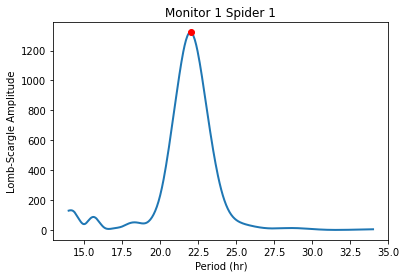

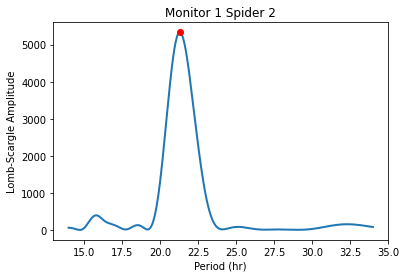

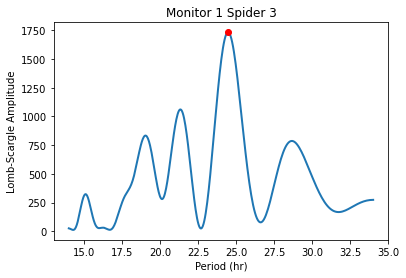

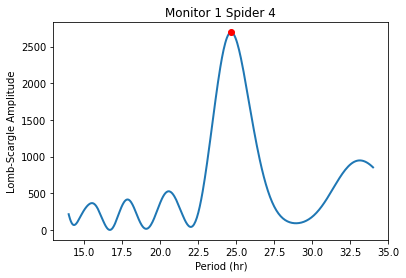

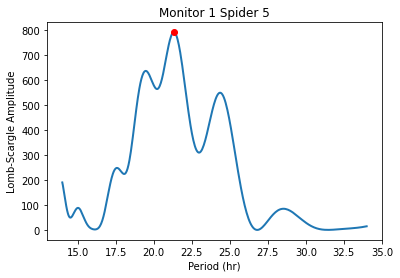

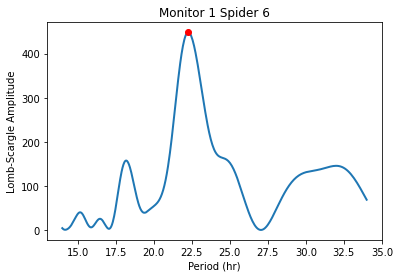

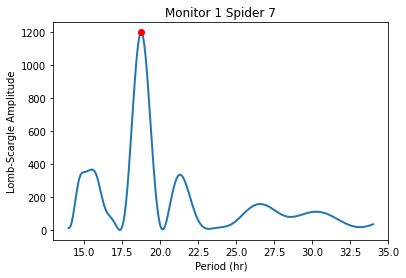

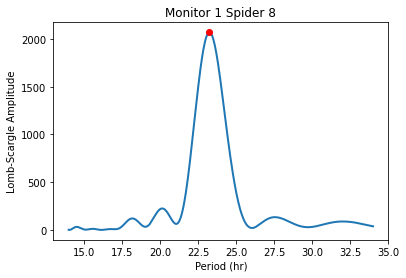

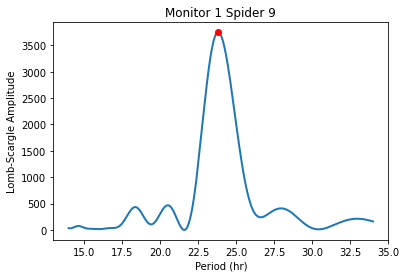

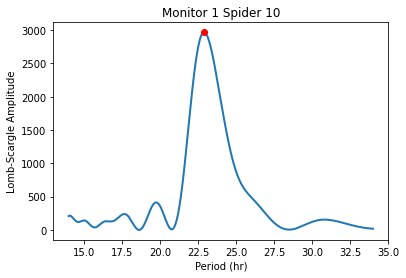

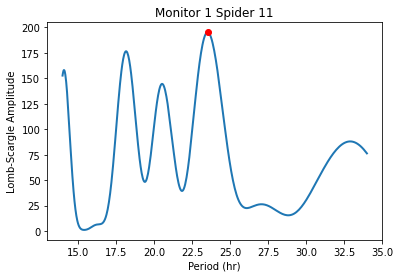

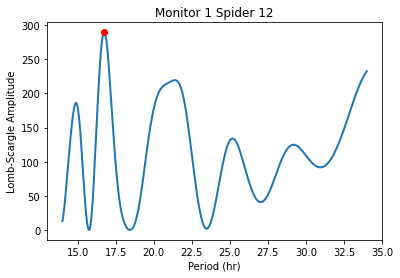

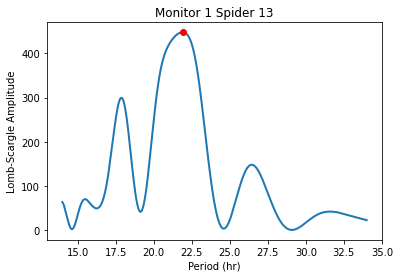

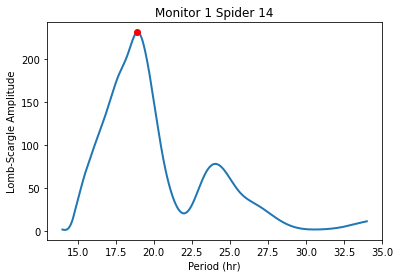

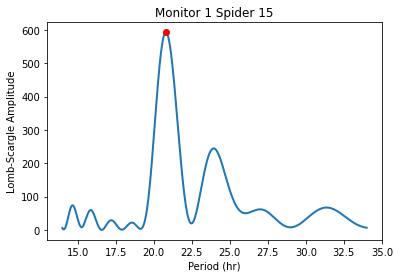

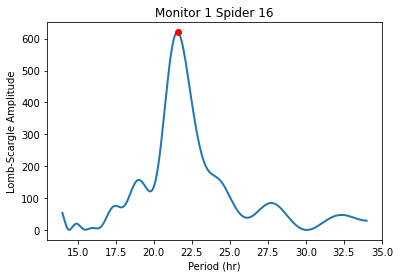

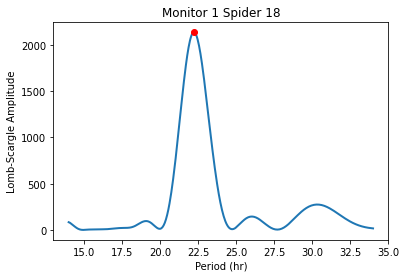

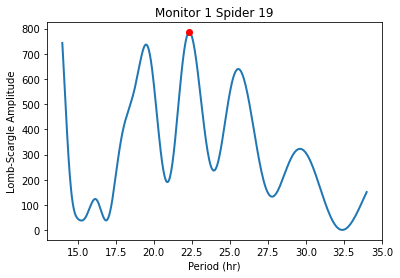

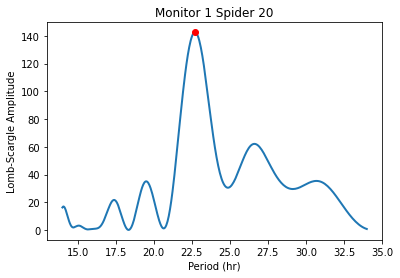

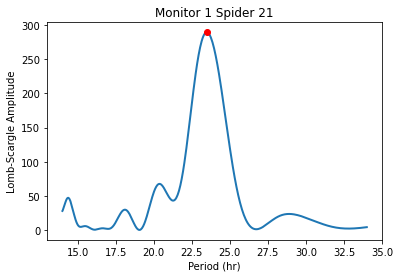

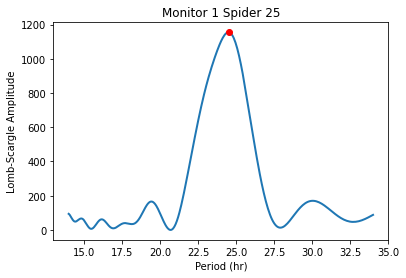

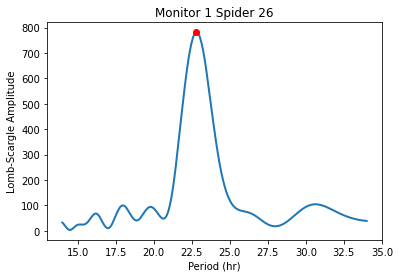

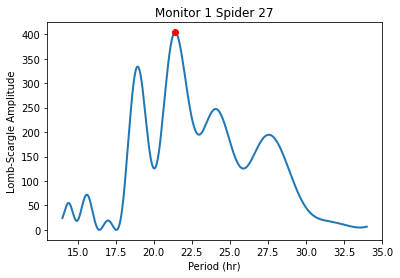

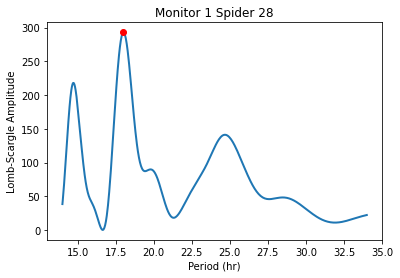

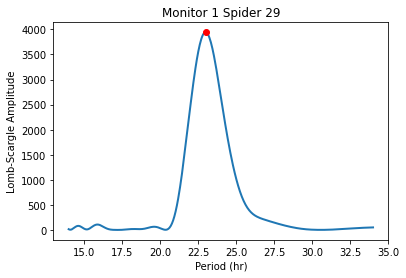

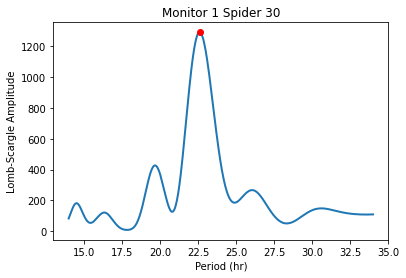

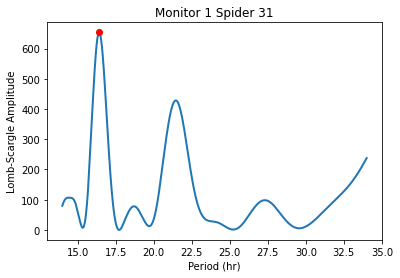

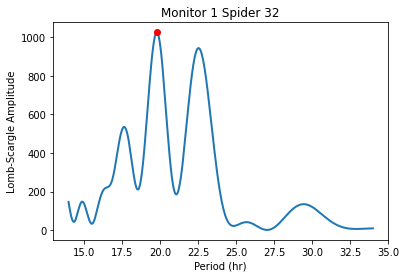

Period    Amplitude  p value
Spider                                             
Monitor 1 Spider 1  22.011150  1322.464061      0.0
Monitor 1 Spider 2  21.316001  5333.174854      0.0
Monitor 1 Spider 3  24.453386  1734.088370      0.0
Monitor 1 Spider 4  24.676897  2695.489814      0.0
Monitor 1 Spider 5  21.316001   790.538587      0.0

In [78]:
spider_datafile_base = "Metazygia monitor 1_DD"       # specify the base filename for the set of spiders                       
df_out = LS_Period_Amplitude_FalseAlarm_Pgram(spider_datafile_base)
   # get the dataframe with Lomb-Scargle periodogram data, while outputting .png periodograms for each spider
df_out = df_out.set_index('Spider')     # reformat the index column in the dataframe
outfile = spider_datafile_base + '_Stats.csv'  # create the output filename for the dataframe with Lomb-Scargle stats
#df_out.to_csv(outfile)                # output the dataframe to file
display(df_out.head())                       # show the dataframe below

In [80]:
#Make csvs without day 1 and 2
day=60*24
df=pd.read_csv('Metazygia monitor 1_DD.csv',index_col=0)
minusone=df.iloc[day:]
minusone.to_csv('Metazygia monitor 1_DD-MINUS DAY 1.csv') 

minustwo=df.iloc[(2*day):]
minustwo.to_csv('Metazygia monitor 1_DD-MINUS DAY 1 AND 2.csv') 


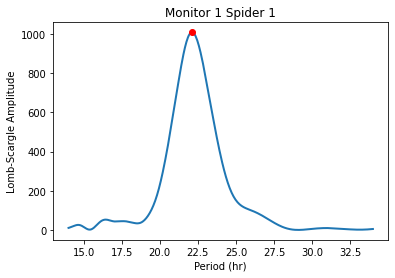

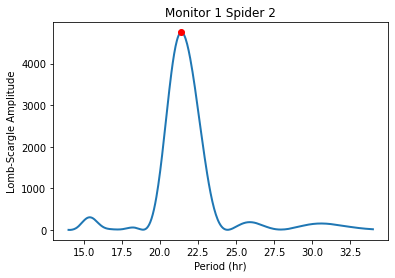

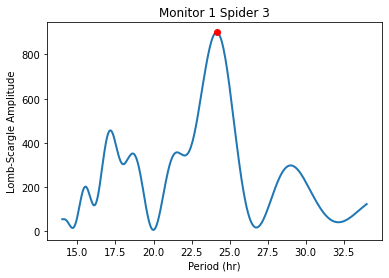

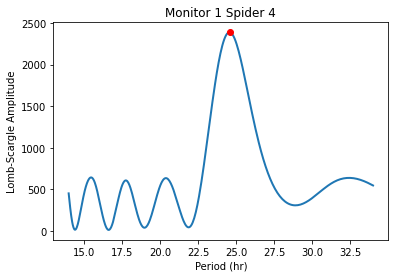

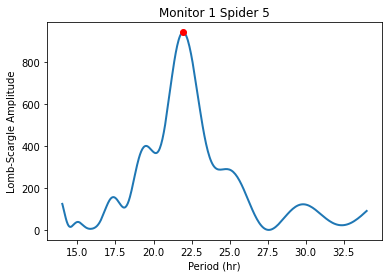

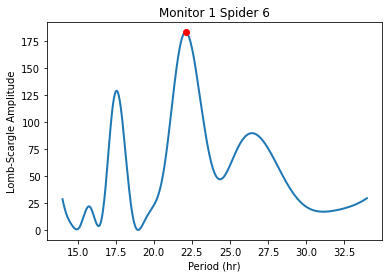

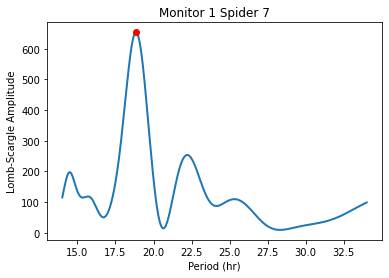

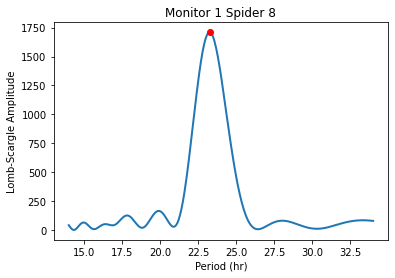

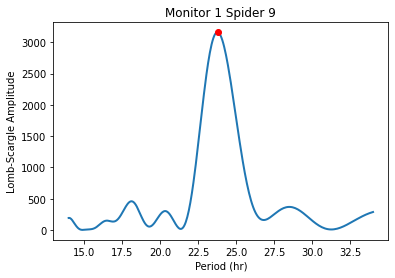

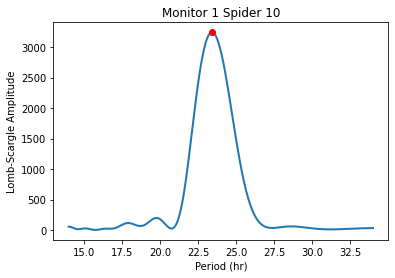

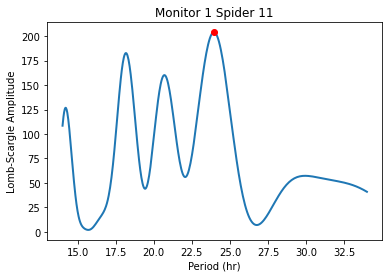

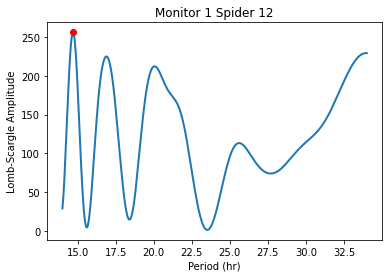

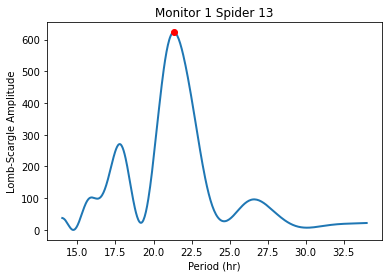

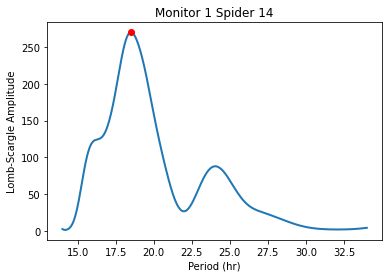

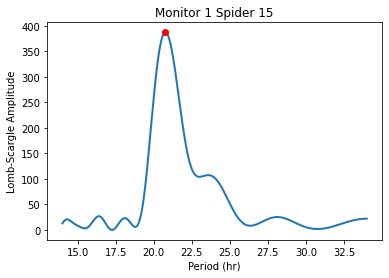

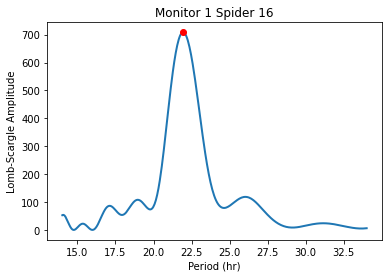

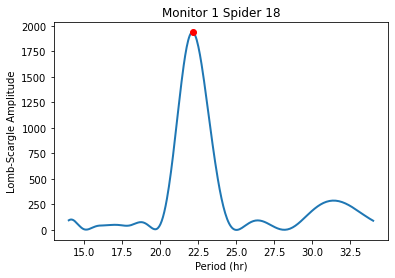

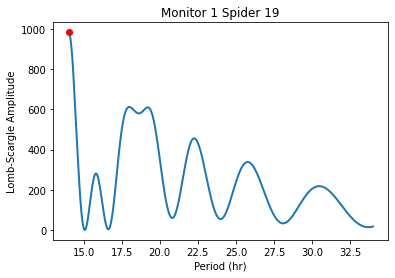

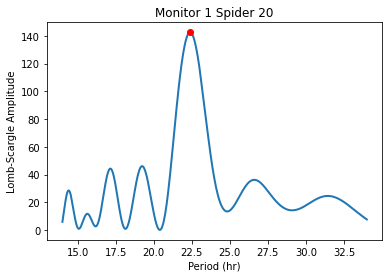

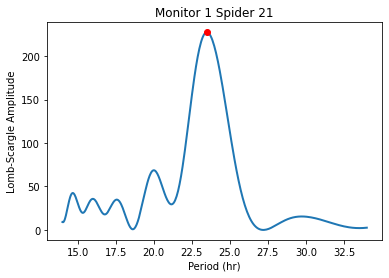

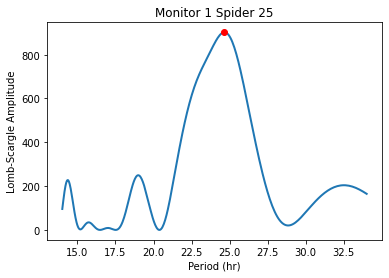

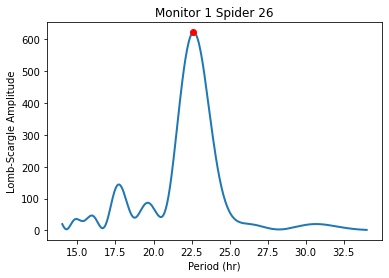

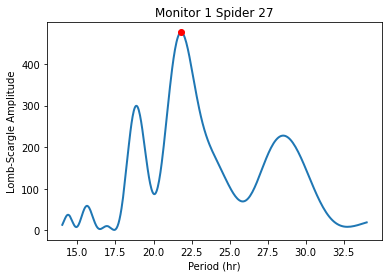

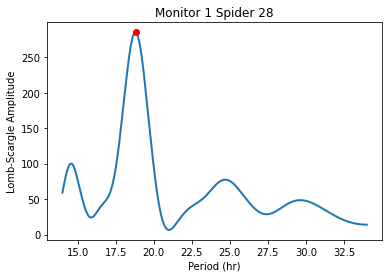

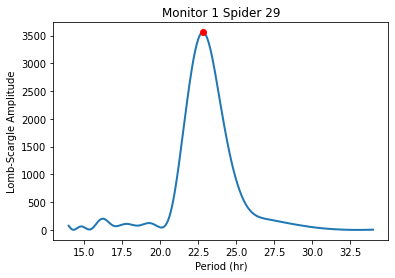

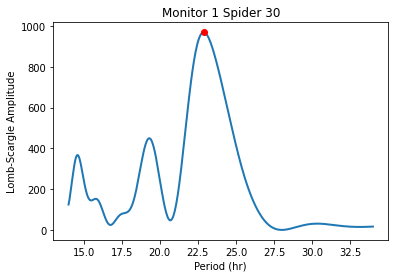

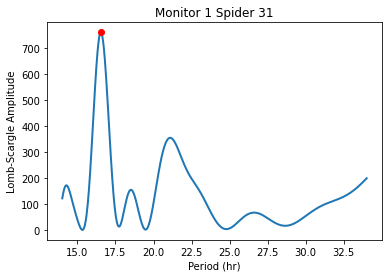

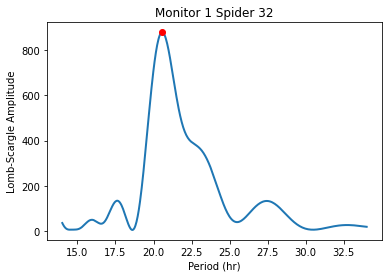

Period    Amplitude  p value
Spider                                             
Monitor 1 Spider 1  22.101170  1010.056873      0.0
Monitor 1 Spider 2  21.411015  4755.658497      0.0
Monitor 1 Spider 3  24.159275   900.356893      0.0
Monitor 1 Spider 4  24.592538  2388.728546      0.0
Monitor 1 Spider 5  21.949560   944.353335      0.0

In [81]:
spider_datafile_base = "Metazygia monitor 1_DD-MINUS DAY 1"       # specify the base filename for the set of spiders                       
df_outone = LS_Period_Amplitude_FalseAlarm_Pgram(spider_datafile_base)
   # get the dataframe with Lomb-Scargle periodogram data, while outputting .png periodograms for each spider
df_outone = df_outone.set_index('Spider')     # reformat the index column in the dataframe
outfile = spider_datafile_base + '_Stats.csv'  # create the output filename for the dataframe with Lomb-Scargle stats
#df_outone.to_csv(outfile)                # output the dataframe to file
display(df_outone.head())                       # show the dataframe below

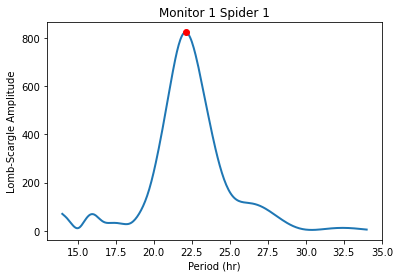

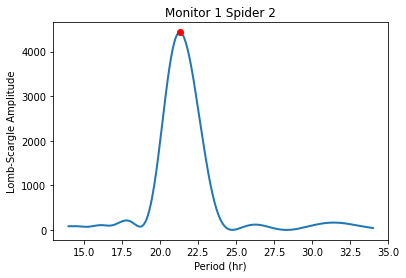

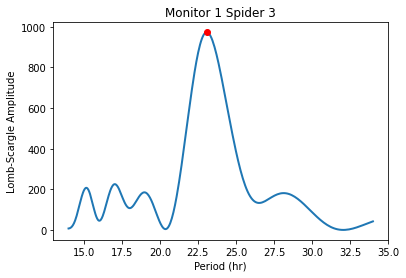

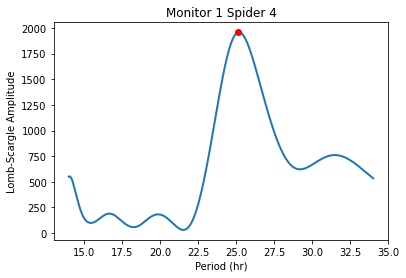

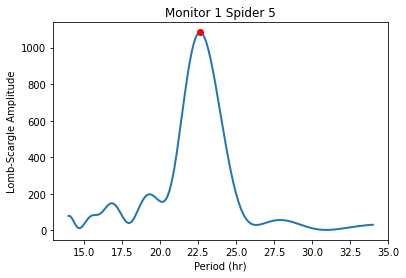

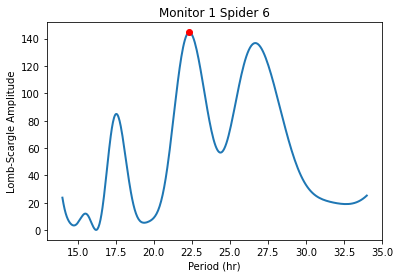

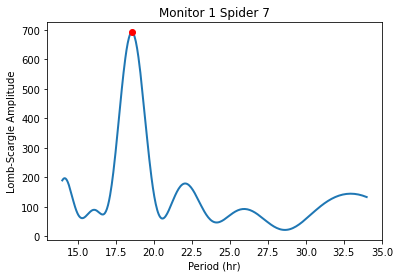

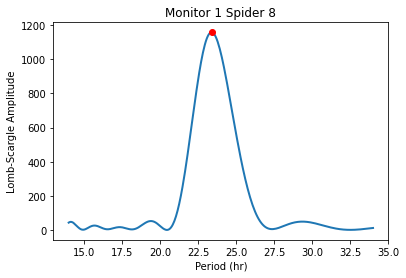

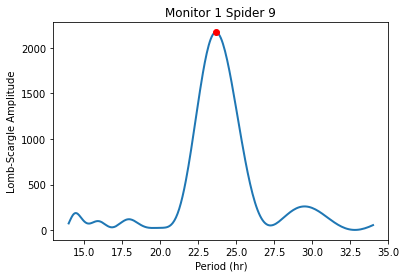

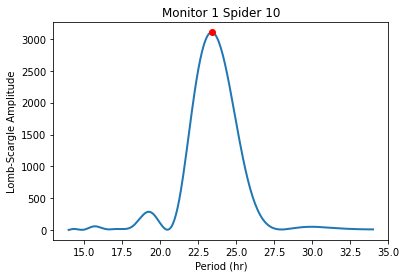

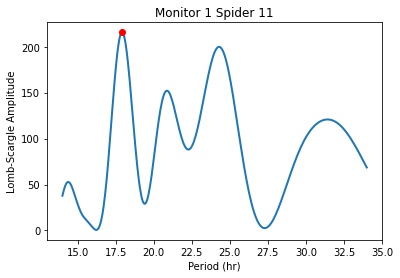

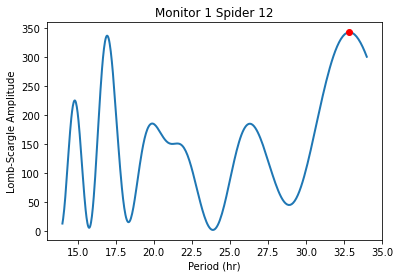

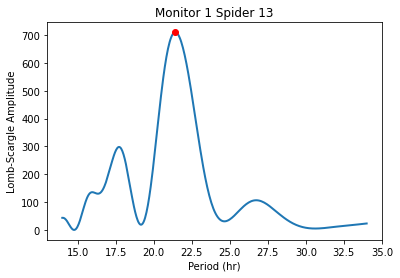

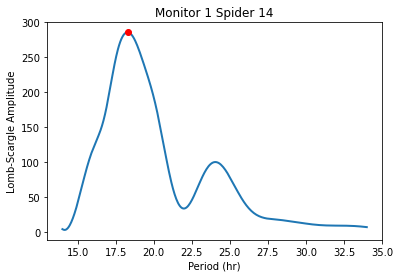

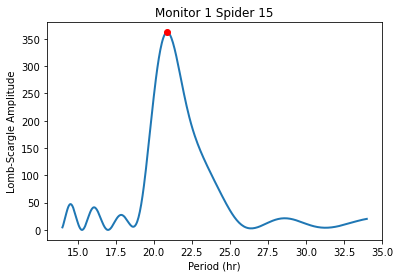

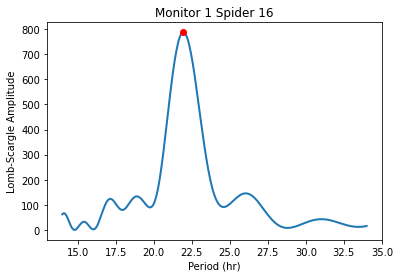

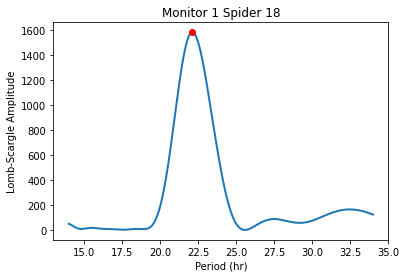

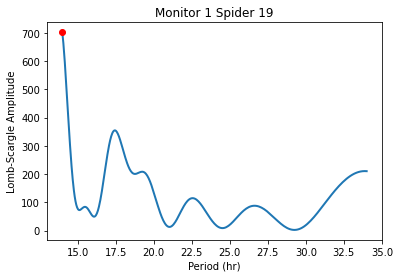

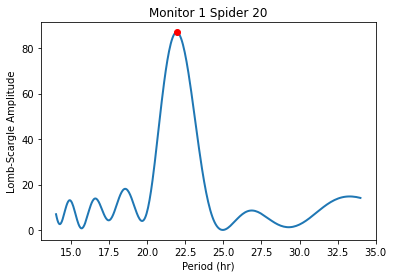

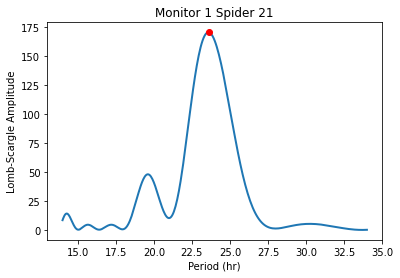

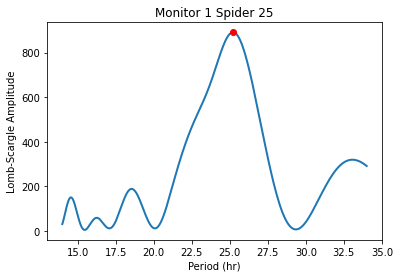

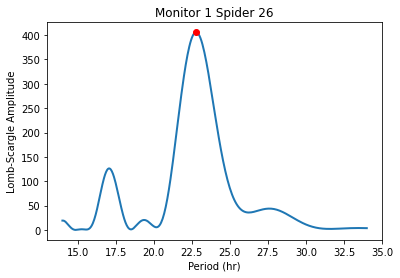

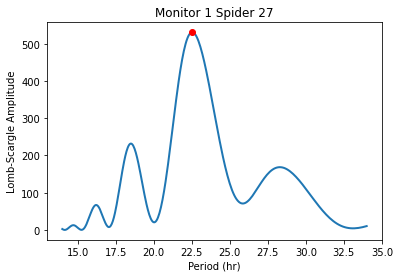

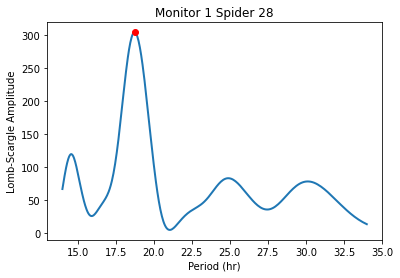

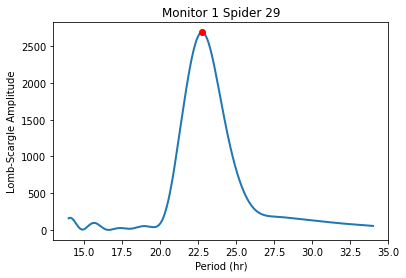

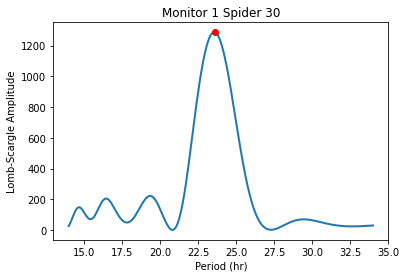

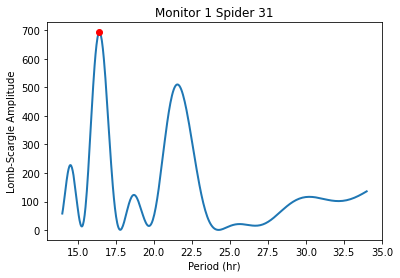

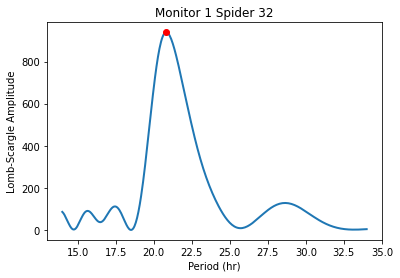

Period    Amplitude  p value
Spider                                             
Monitor 1 Spider 1  22.101074   823.454875      0.0
Monitor 1 Spider 2  21.315825  4434.849359      0.0
Monitor 1 Spider 3  23.072459   973.136330      0.0
Monitor 1 Spider 4  25.144622  1958.630422      0.0
Monitor 1 Spider 5  22.637170  1084.180758      0.0

In [82]:
spider_datafile_base = "Metazygia monitor 1_DD-MINUS DAY 1 AND 2"       # specify the base filename for the set of spiders                       
df_outtwo = LS_Period_Amplitude_FalseAlarm_Pgram(spider_datafile_base)
   # get the dataframe with Lomb-Scargle periodogram data, while outputting .png periodograms for each spider
df_outtwo = df_outtwo.set_index('Spider')     # reformat the index column in the dataframe
outfile = spider_datafile_base + '_Stats.csv'  # create the output filename for the dataframe with Lomb-Scargle stats
#df_out.to_csv(outfile)                # output the dataframe to file
display(df_outtwo.head())                       # show the dataframe below

In [83]:
column=df.columns[1:]
perone=pd.DataFrame(data= df_outone['Period'],index=column)
pertwo=pd.DataFrame(data= df_outtwo['Period'],index=column)
per=pd.DataFrame(data=df_out['Period'],index=column)

Monitor 1 Spider 1
Next spider
Monitor 1 Spider 2
Next spider
Monitor 1 Spider 3
Next spider
Monitor 1 Spider 4
Next spider
Monitor 1 Spider 5
Next spider
Monitor 1 Spider 6
Next spider
Monitor 1 Spider 7
Next spider
Monitor 1 Spider 8
Next spider
Monitor 1 Spider 9
Next spider
Monitor 1 Spider 10
Next spider
Monitor 1 Spider 11
Next spider
Monitor 1 Spider 12
Next spider
Monitor 1 Spider 13
Next spider
Monitor 1 Spider 14
Next spider
Monitor 1 Spider 15
Next spider
Monitor 1 Spider 16
Next spider
Monitor 1 Spider 18
Next spider
Monitor 1 Spider 19
Next spider
Monitor 1 Spider 20
Next spider
Monitor 1 Spider 21
Next spider
Monitor 1 Spider 25


<ipython-input-77-4dc8525d025d>:79: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax=plt.subplots(num_days,1, figsize=(8,12), sharey=True)


Next spider
Monitor 1 Spider 26
Next spider
Monitor 1 Spider 27
Next spider
Monitor 1 Spider 28
Next spider
Monitor 1 Spider 29
Next spider
Monitor 1 Spider 30
Next spider
Monitor 1 Spider 31
Next spider
Monitor 1 Spider 32
Next spider


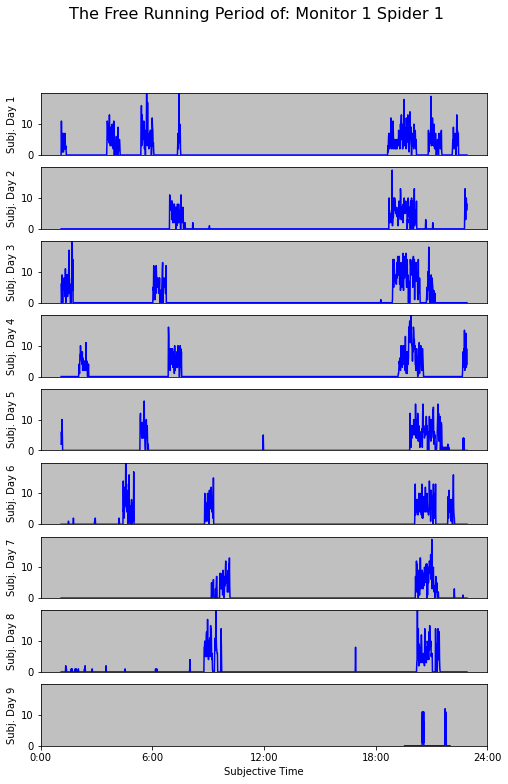

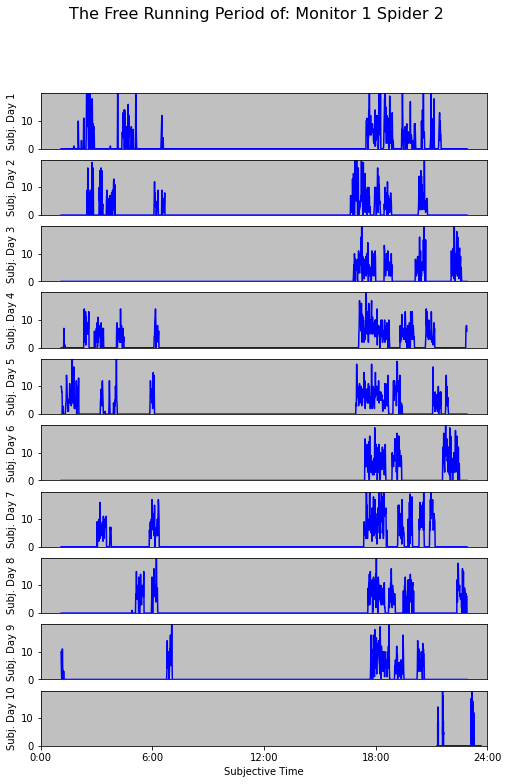

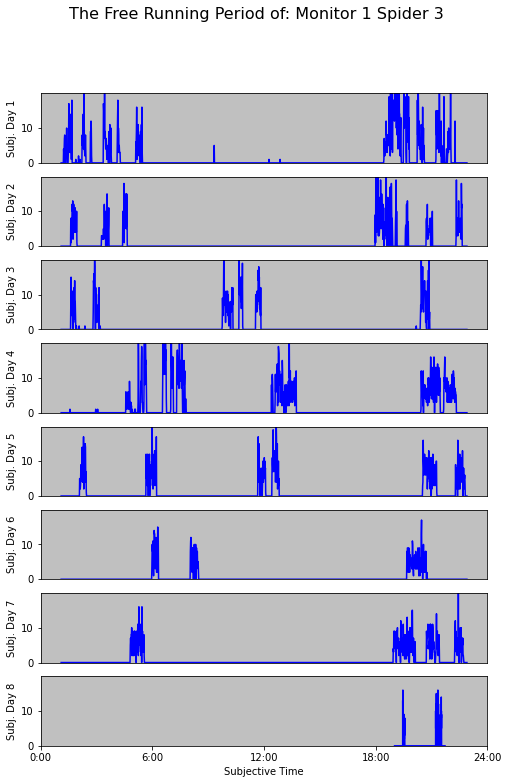

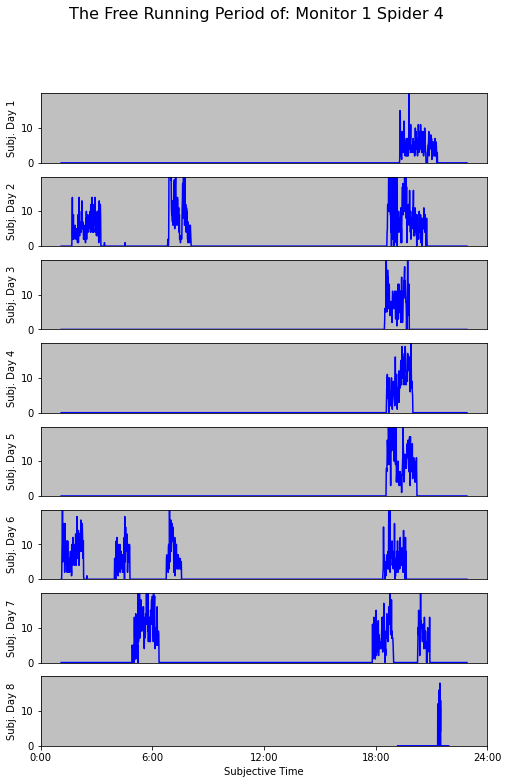

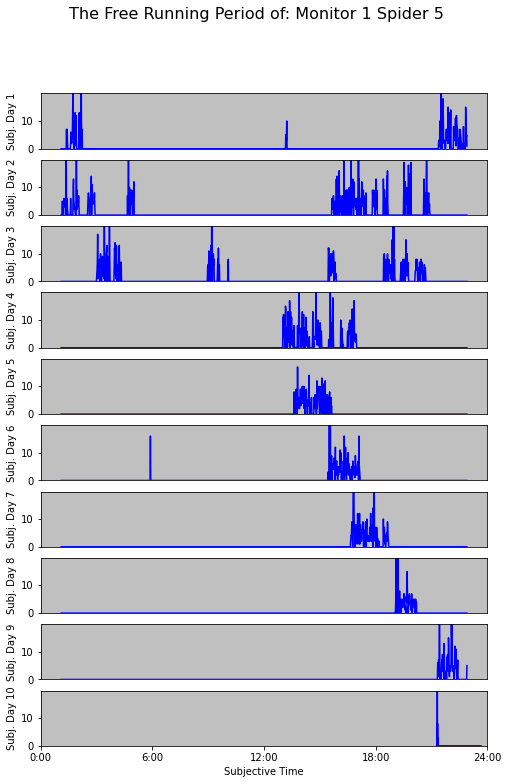

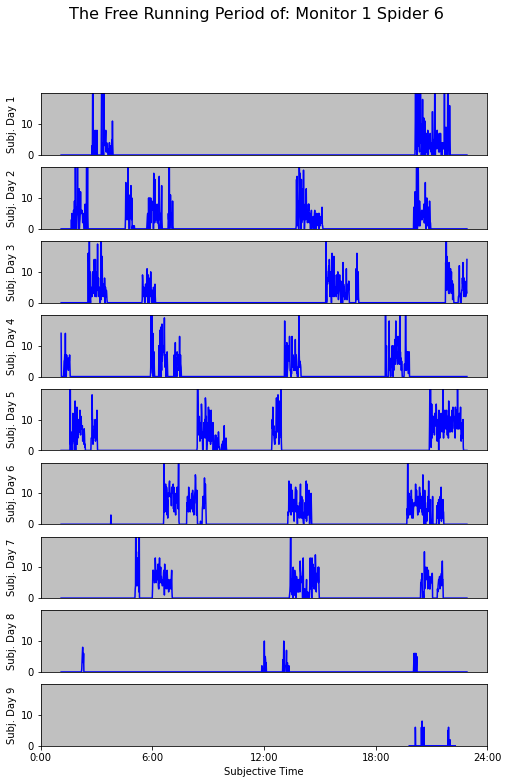

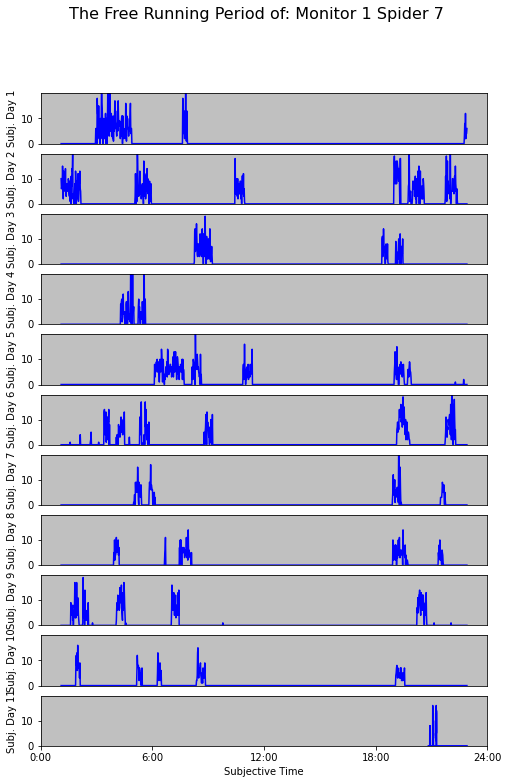

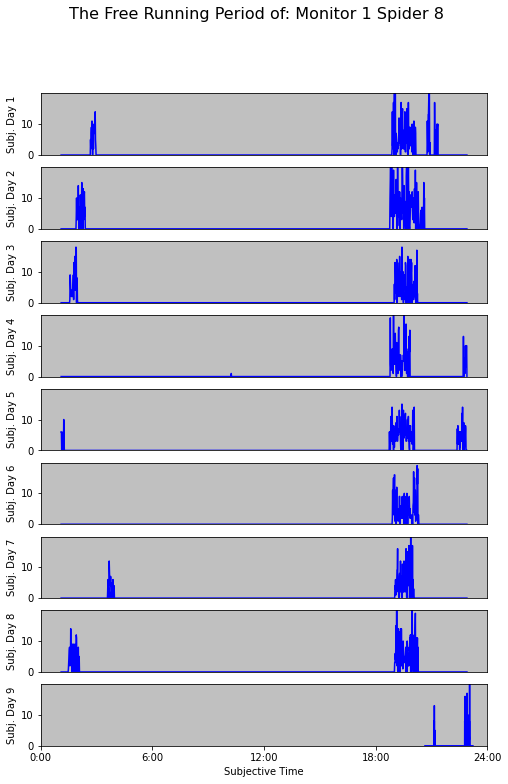

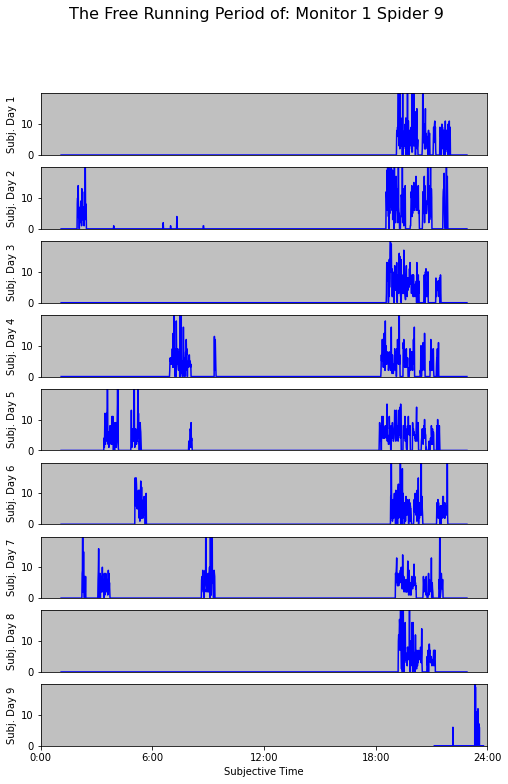

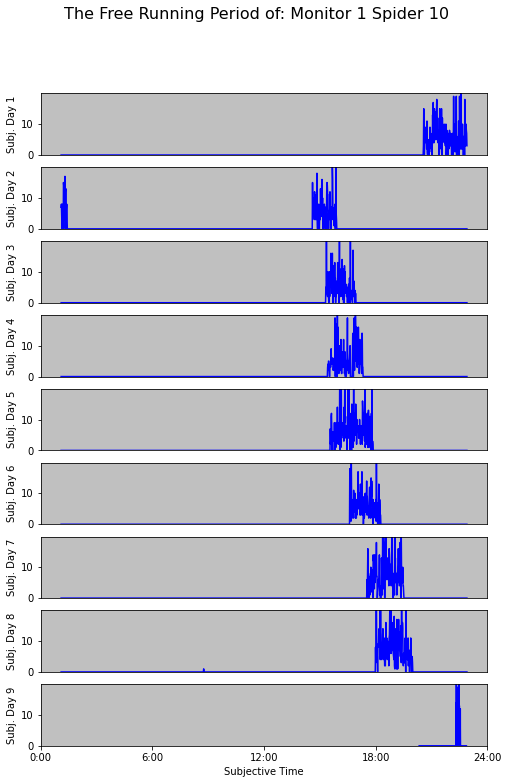

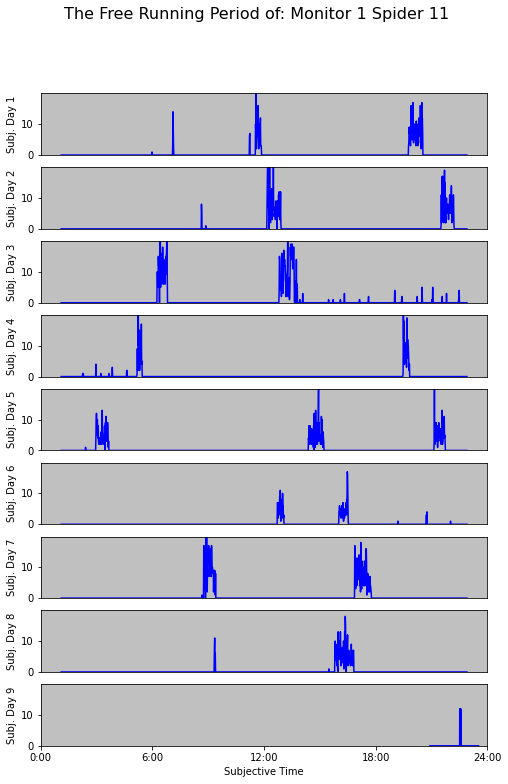

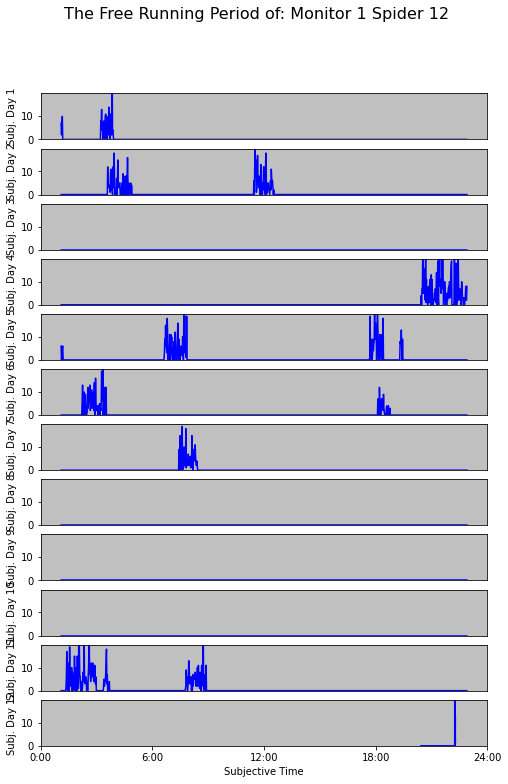

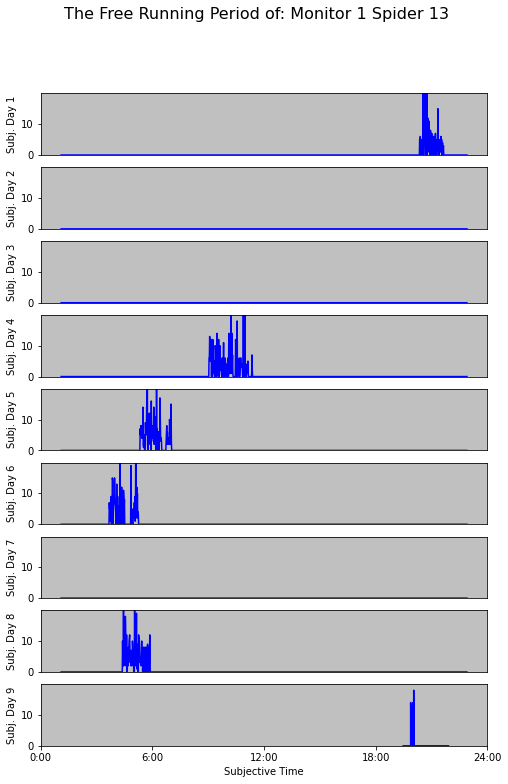

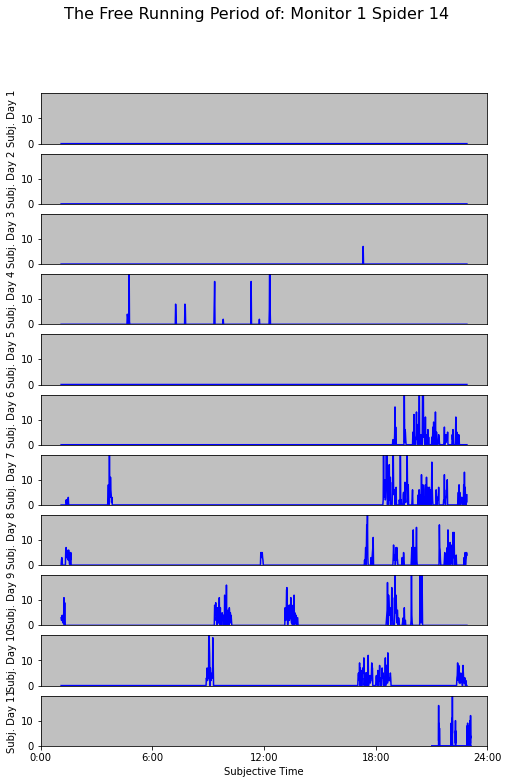

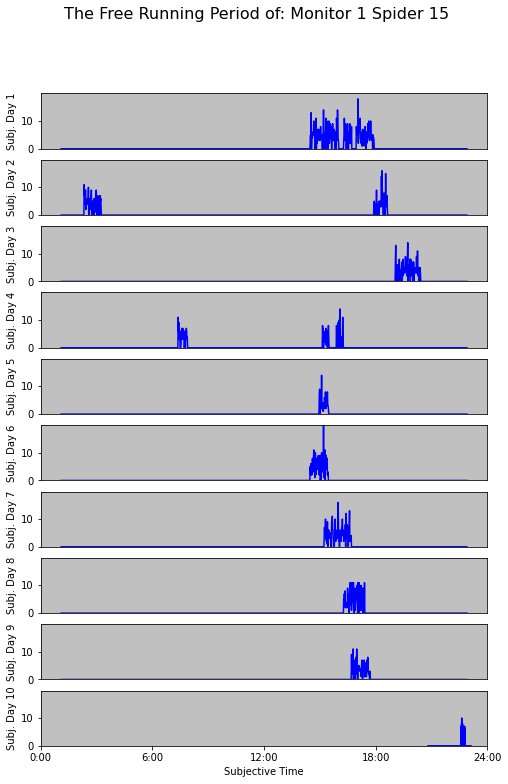

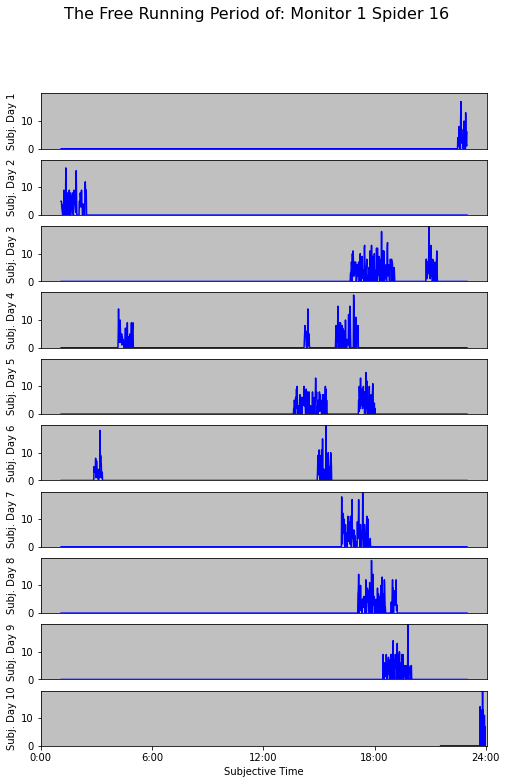

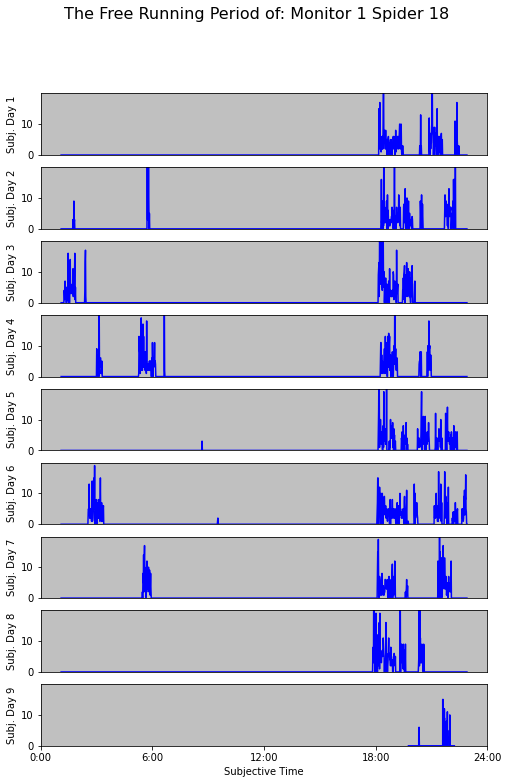

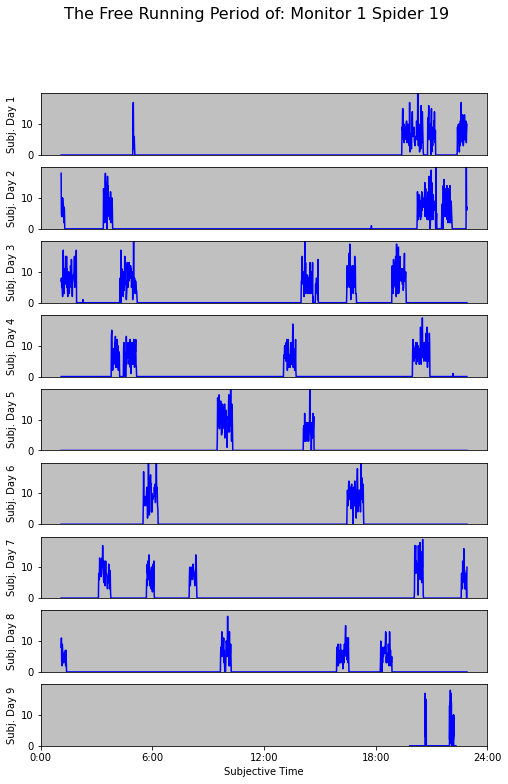

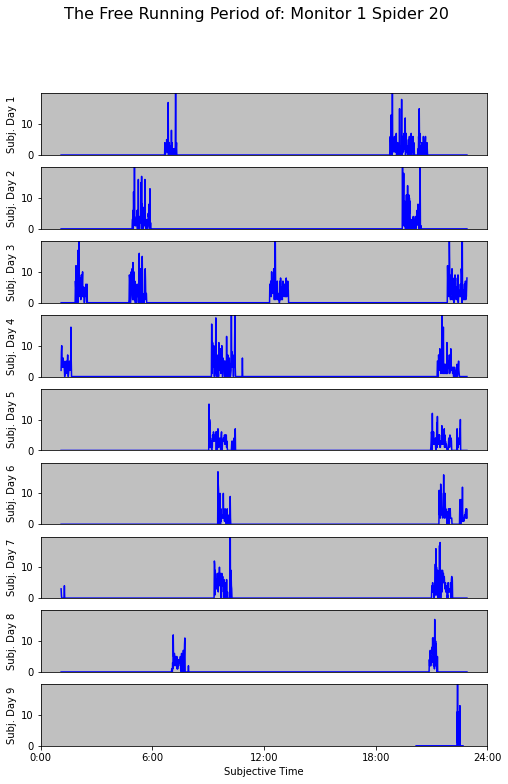

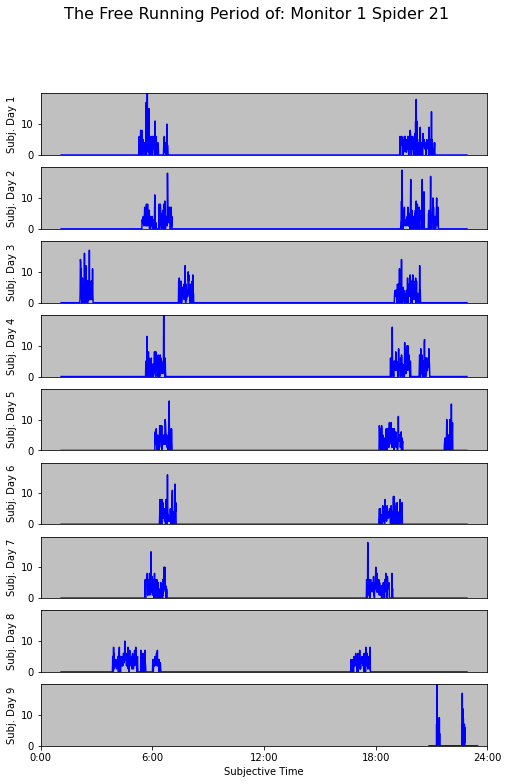

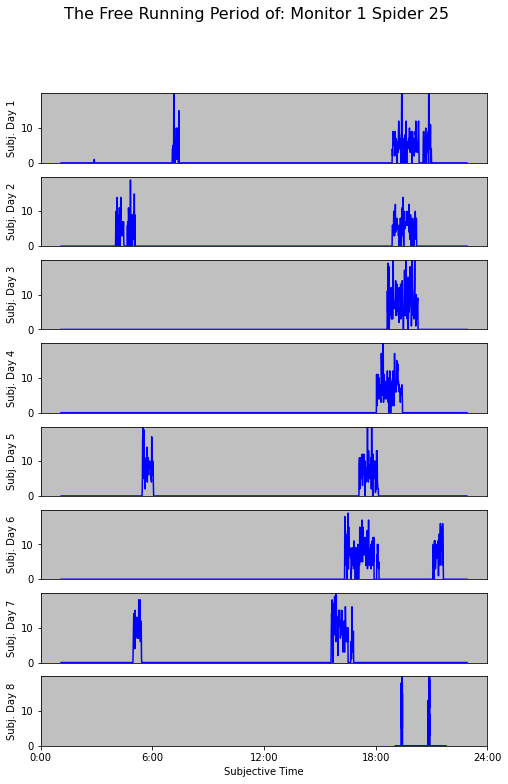

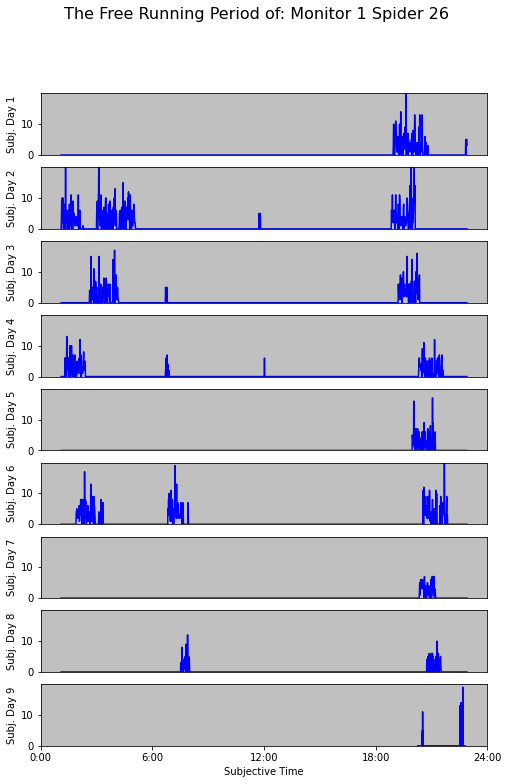

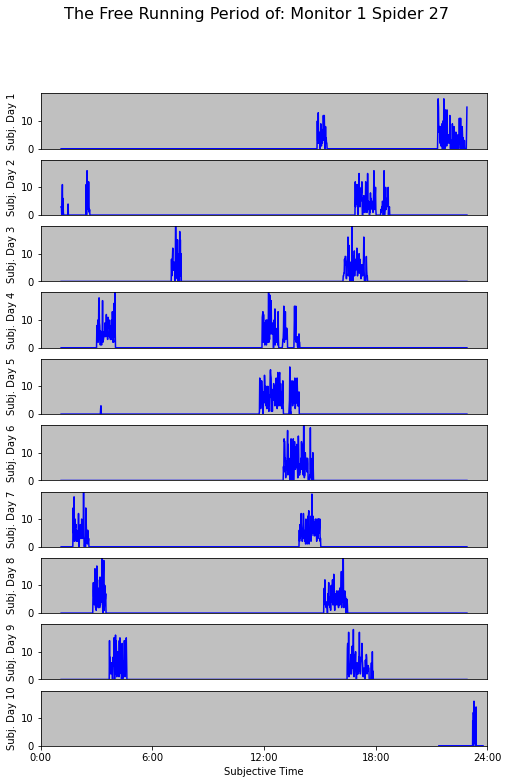

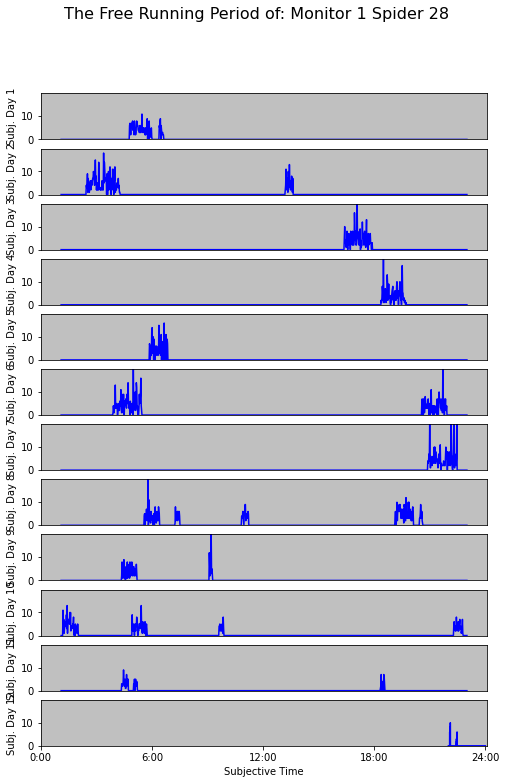

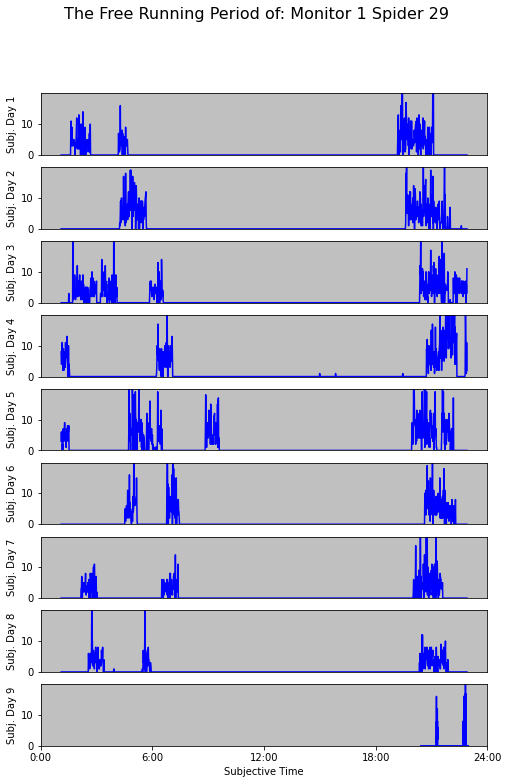

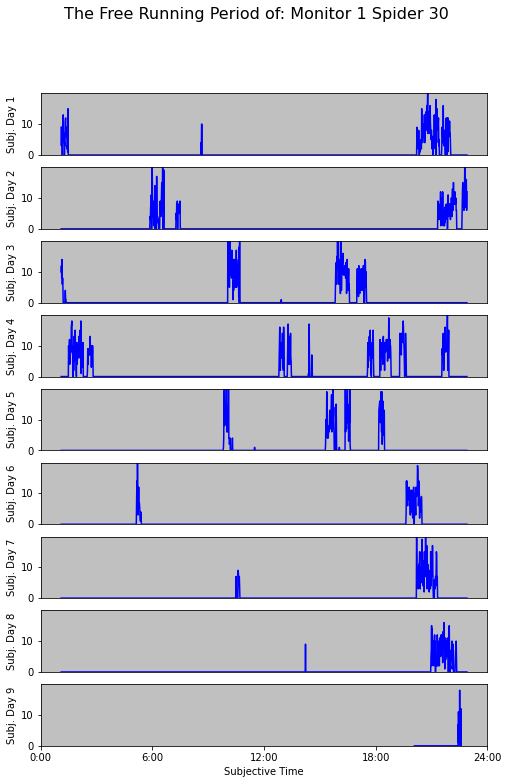

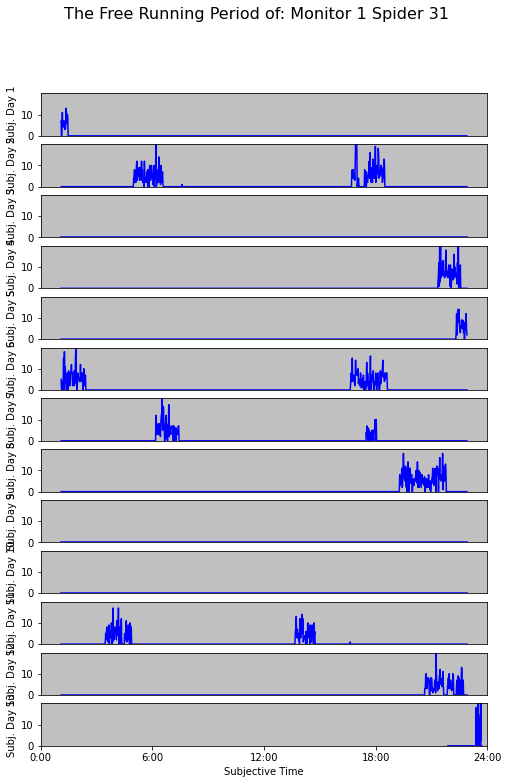

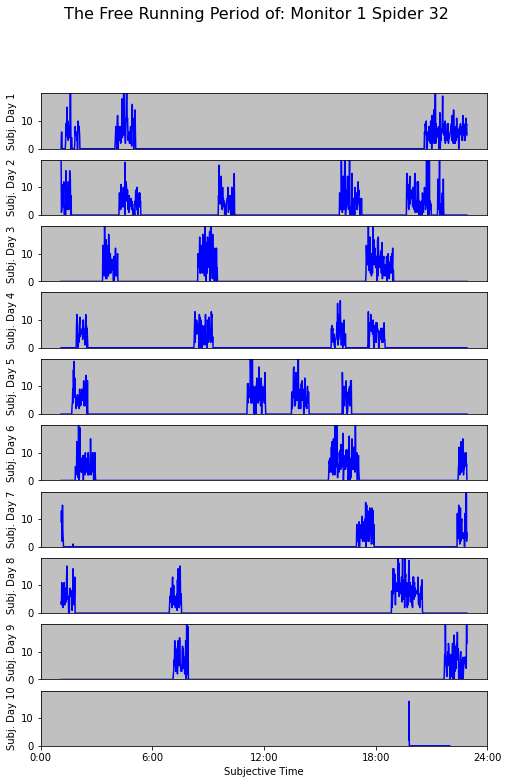

In [84]:
spider_raster(df,per)

In [11]:
#spider_raster(minusone, perone)

In [12]:
#spider_raster(minustwo,pertwo)

In [13]:
periods=pd.DataFrame()
periods['All Days']=per
periods['Minus Day 1']=perone
periods['Minus Day 1 and 2']=pertwo
display(periods)
#periods.to_csv('Metazygia Period Data.csv')

All Days  Minus Day 1  Minus Day 1 and 2
Monitor 1 Spider 1   14.142022    16.455853          15.966956
Monitor 1 Spider 2   15.820114    15.399854          17.793551
Monitor 1 Spider 3   21.316001    17.161950          17.035664
Monitor 1 Spider 4   33.164677    15.474330          31.453511
Monitor 1 Spider 5   19.471200    19.497486          19.306906
Monitor 1 Spider 6   18.191975    17.570322          26.661117
Monitor 1 Spider 7   15.502178    22.203413          14.163037
Monitor 1 Spider 8   20.124325    19.901723          19.396076
Monitor 1 Spider 9   20.506465    18.134614          29.467212
Monitor 1 Spider 10  19.756168    19.778703          19.262628
Monitor 1 Spider 11  18.161381    18.168938          24.272641
Monitor 1 Spider 12  21.400484    16.890175          16.932632
Monitor 1 Spider 13  17.890595    17.765430          17.718478
Monitor 1 Spider 14  24.018294    24.038275          24.064014
Monitor 1 Spider 15  23.964994    23.566159          14.530568
Monitor 1 Spider 16  19.025260    26.061433          26.081589
Monitor 1 Spider 18  30.366935    31.438824          32.424919
Monitor 1 Spider 19  19.506371    19.224154          33.862922
Monitor 1 Spider 20  26.623684    19.224154          18.539802
Monitor 1 Spider 21  20.390308    20.026283          19.622648
Monitor 1 Spider 25  30.029170    18.995897          33.063119
Monitor 1 Spider 26  30.625287    17.732611          17.070286
Monitor 1 Spider 27  18.925236    18.883789          18.498969
Monitor 1 Spider 28  14.720331    14.581121          14.581018
Monitor 1 Spider 29  15.889948    16.260722          14.091750
Monitor 1 Spider 30  19.684147    19.301464          19.351389
Monitor 1 Spider 31  21.442977    21.081852          21.589784
Monitor 1 Spider 32  22.563013    17.602542          28.662741

# Experimenting with Different Periods

In [105]:
dfnewper=df.loc[:,['lights','Monitor 1 Spider 6', 'Monitor 1 Spider 7', 'Monitor 1 Spider 11', 'Monitor 1 Spider 12', 'Monitor 1 Spider 15', 'Monitor 1 Spider 19', 'Monitor 1 Spider 25', 'Monitor 1 Spider 31']]
dfnewper.to_csv('Meta Test File.csv')

157.40711769562242


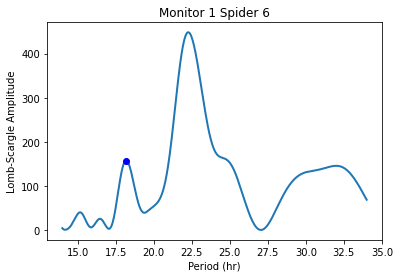

365.5098060055597


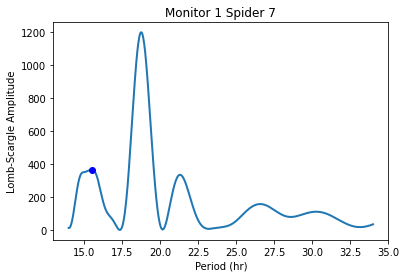

176.61786097308118


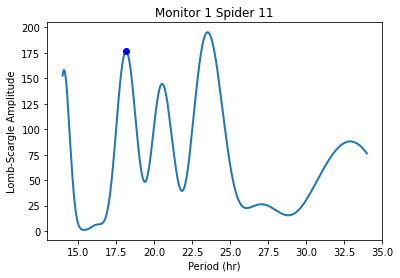

219.46031246304767


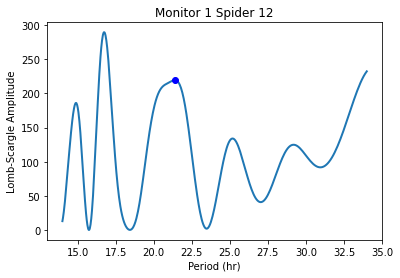

244.57903409294966


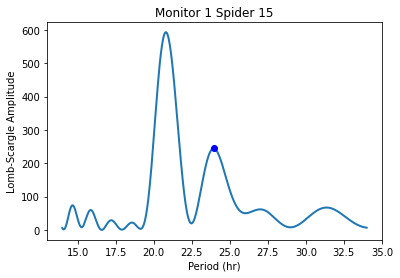

736.457940484809


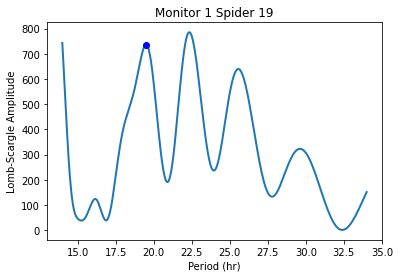

170.2458053324155


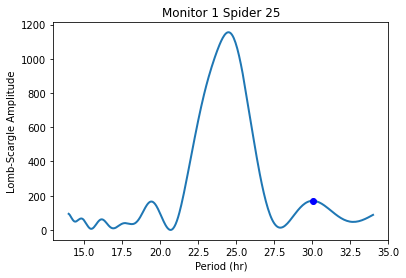

428.28183166545523


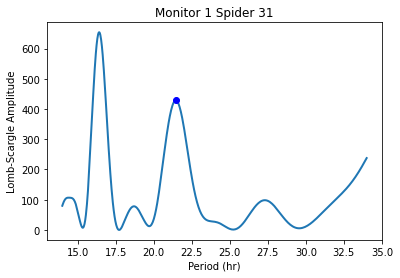

Period    Amplitude        p value
Spider                                                    
Monitor 1 Spider 6   18.191975   448.548039  1.108054e-189
Monitor 1 Spider 7   15.502178  1197.711121   0.000000e+00
Monitor 1 Spider 11  18.161381   195.296153   7.077836e-80
Monitor 1 Spider 12  21.400484   289.586299  9.677260e-121
Monitor 1 Spider 15  23.964994   592.966000  2.427996e-252
Monitor 1 Spider 19  19.506371   785.348799   0.000000e+00
Monitor 1 Spider 25  30.029170  1155.190593   0.000000e+00
Monitor 1 Spider 31  21.442977   653.895576  8.812693e-279

In [106]:
spider_datafile_base = "Meta Test File"                          
df_out = LS_Period_Amplitude_FalseAlarm_Pgram2(spider_datafile_base)
df_outnew = df_out.set_index('Spider')    
outfile = spider_datafile_base + '_Stats.csv'  
#df_out.to_csv(outfile)               
display(df_outnew)                      

In [87]:
pertest=pd.DataFrame(data= df_outnew['Period'],index=dfnewper.columns[1:])
#spider_raster(dfnewper,pertest)

Period
Monitor 1 Spider 6   18.191975
Monitor 1 Spider 7   15.502178
Monitor 1 Spider 11  18.161381
Monitor 1 Spider 12  21.400484
Monitor 1 Spider 15  23.964994
Monitor 1 Spider 19  19.506371
Monitor 1 Spider 25  30.029170
Monitor 1 Spider 31  21.442977

Monitor 1 Spider 6
Next spider
Monitor 1 Spider 7
Next spider
Monitor 1 Spider 11
Next spider
Monitor 1 Spider 12
Next spider
Monitor 1 Spider 15
Next spider
Monitor 1 Spider 19
Next spider
Monitor 1 Spider 25
Next spider
Monitor 1 Spider 31
Next spider


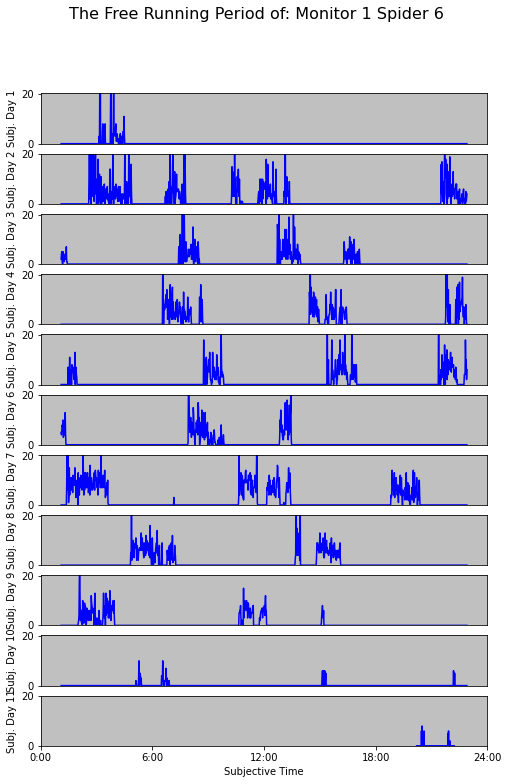

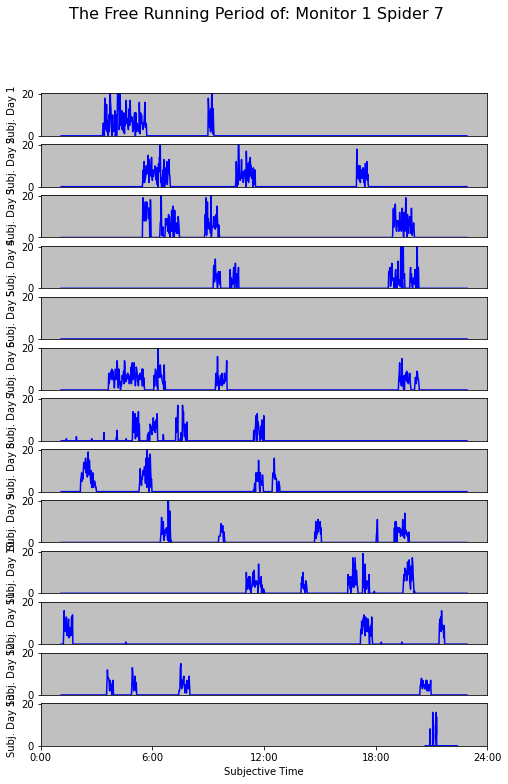

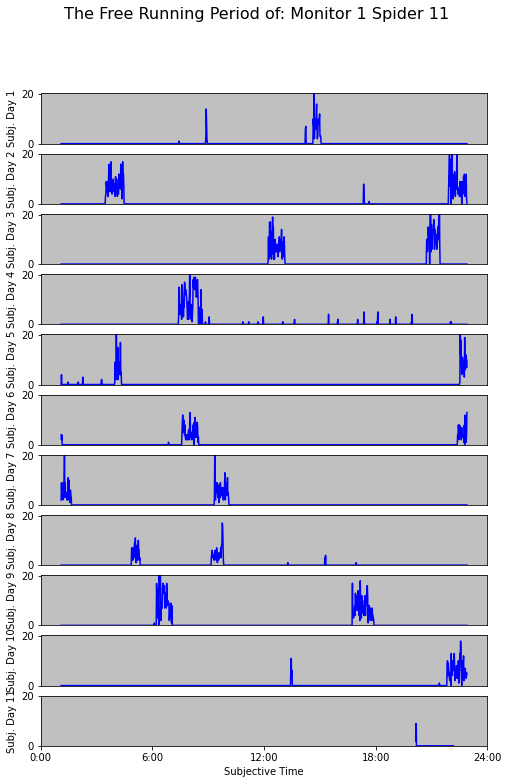

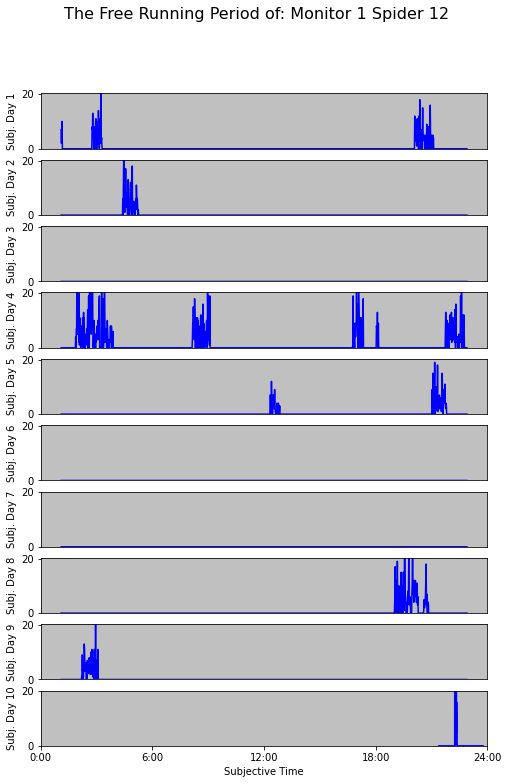

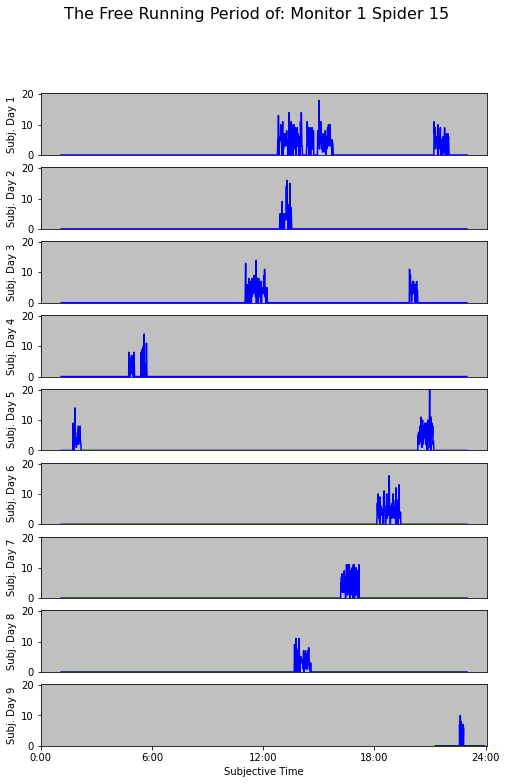

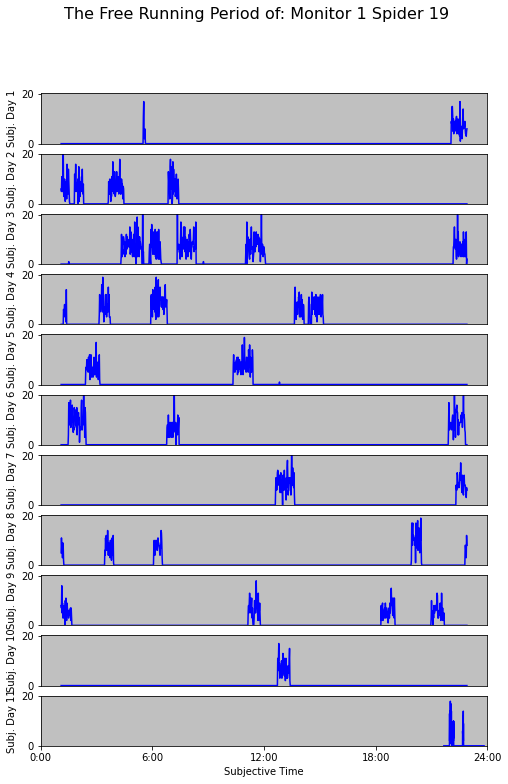

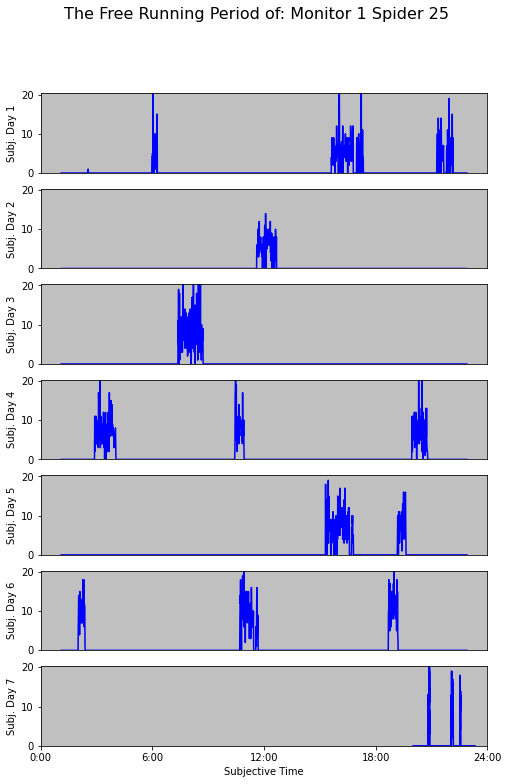

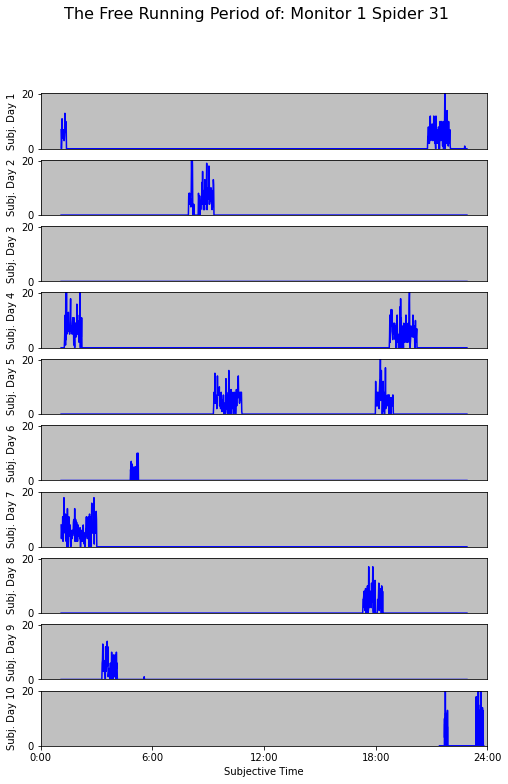

In [40]:
#pertest['Period']=pertest["Period"]-.05
display(pertest)
#spider_raster(dfnewper,pertest)

In [89]:

testminusone=minusone.loc[:,['lights','Monitor 1 Spider 19']]
#testminusone.to_csv('TEST DELETE 1.csv')
testminustwo=minustwo.loc[:,['lights','Monitor 1 Spider 19']]
#testminustwo.to_csv('TEST DELETE 2.csv')

In [95]:

'''''spider_datafile_base = "TEST DELETE 1"       # specify the base filename for the set of spiders                       
df_outonetest = LS_Period_Amplitude_FalseAlarm_Pgram(spider_datafile_base)
   # get the dataframe with Lomb-Scargle periodogram data, while outputting .png periodograms for each spider
df_outonetest = df_outonetest.set_index('Spider')     # reformat the index column in the dataframe
outfile = spider_datafile_base + '_Stats.csv'  # create the output filename for the dataframe with Lomb-Scargle stats
#df_out.to_csv(outfile)                # output the dataframe to file
display(df_outonetest.head())                       # show the dataframe below
peronetest=pd.DataFrame(data= df_outonetest['Period'],index=testminusone.columns[1:])
'''''

'\'\'spider_datafile_base = "TEST DELETE 1"       # specify the base filename for the set of spiders                       \ndf_outonetest = LS_Period_Amplitude_FalseAlarm_Pgram(spider_datafile_base)\n   # get the dataframe with Lomb-Scargle periodogram data, while outputting .png periodograms for each spider\ndf_outonetest = df_outonetest.set_index(\'Spider\')     # reformat the index column in the dataframe\noutfile = spider_datafile_base + \'_Stats.csv\'  # create the output filename for the dataframe with Lomb-Scargle stats\n#df_out.to_csv(outfile)                # output the dataframe to file\ndisplay(df_outonetest.head())                       # show the dataframe below\nperonetest=pd.DataFrame(data= df_outonetest[\'Period\'],index=testminusone.columns[1:])\n'

In [97]:
'''''spider_datafile_base = "TEST DELETE 2"       # specify the base filename for the set of spiders                       
df_outtwotest = LS_Period_Amplitude_FalseAlarm_Pgram(spider_datafile_base)
   # get the dataframe with Lomb-Scargle periodogram data, while outputting .png periodograms for each spider
df_outtwotest = df_outtwotest.set_index('Spider')     # reformat the index column in the dataframe
outfile = spider_datafile_base + '_Stats.csv'  # create the output filename for the dataframe with Lomb-Scargle stats
#df_out.to_csv(outfile)                # output the dataframe to file
display(df_outtwotest.head())                       # show the dataframe below
pertwotest=pd.DataFrame(data= df_outtwotest['Period'],index=testminustwo.columns[1:])
'''''

'\'\'spider_datafile_base = "TEST DELETE 2"       # specify the base filename for the set of spiders                       \ndf_outtwotest = LS_Period_Amplitude_FalseAlarm_Pgram(spider_datafile_base)\n   # get the dataframe with Lomb-Scargle periodogram data, while outputting .png periodograms for each spider\ndf_outtwotest = df_outtwotest.set_index(\'Spider\')     # reformat the index column in the dataframe\noutfile = spider_datafile_base + \'_Stats.csv\'  # create the output filename for the dataframe with Lomb-Scargle stats\n#df_out.to_csv(outfile)                # output the dataframe to file\ndisplay(df_outtwotest.head())                       # show the dataframe below\npertwotest=pd.DataFrame(data= df_outtwotest[\'Period\'],index=testminustwo.columns[1:])\n'

Monitor 1 Spider 19
Next spider


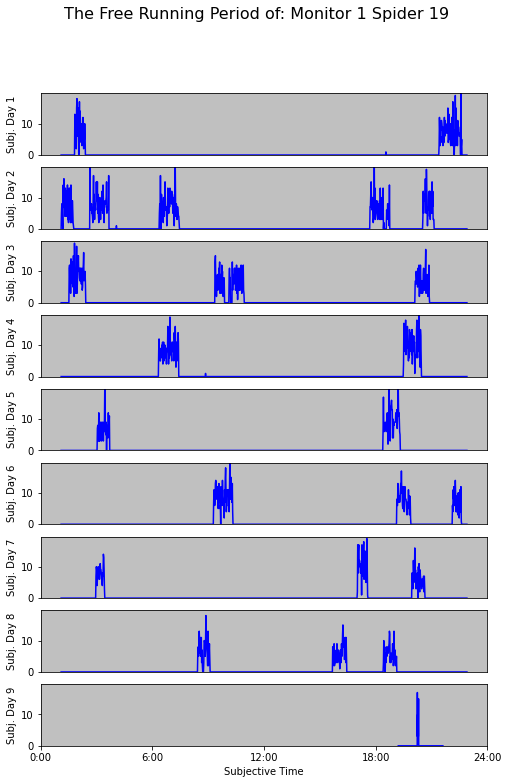

In [20]:
#spider_raster(testminusone, peronetest)

Monitor 1 Spider 19
Next spider


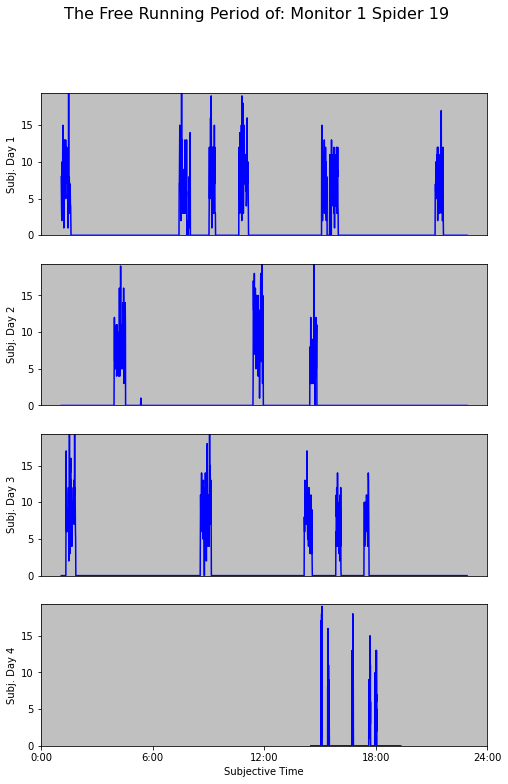

In [21]:
#spider_raster(testminustwo, pertwotest)

# Add/Subtract 10-15 Minutes

In [98]:
manual=df.loc[:,['lights',  'Monitor 1 Spider 32']]
per=pd.read_csv('Metazygia Period Data.csv', index_col=0)
perall=per.loc[:,['All Days']]
perall['All Days']=perall['All Days']+.17 #Add 15 min
#spider_raster(manual, perall)

# Binary Period

In [99]:
dfc=df.copy()
column=dfc.columns[1:]
for spider in range(len(column)):
    dfc[column[spider]] = dfc[column[spider]].apply(lambda x: 1 if x != 0 else 0)
    
display(dfc.head())

lights  Monitor 1 Spider 1  Monitor 1 Spider 2  \
Date_Time                                                             
2017-04-26 00:00:00       0                   0                   0   
2017-04-26 00:01:00       0                   1                   0   
2017-04-26 00:02:00       0                   1                   0   
2017-04-26 00:03:00       0                   1                   0   
2017-04-26 00:04:00       0                   1                   0   

                     Monitor 1 Spider 3  Monitor 1 Spider 4  \
Date_Time                                                     
2017-04-26 00:00:00                   0                   0   
2017-04-26 00:01:00                   0                   0   
2017-04-26 00:02:00                   0                   0   
2017-04-26 00:03:00                   0                   0   
2017-04-26 00:04:00                   0                   0   

                     Monitor 1 Spider 5  Monitor 1 Spider 6  \
Date_Time                                                     
2017-04-26 00:00:00                   0                   0   
2017-04-26 00:01:00                   0                   0   
2017-04-26 00:02:00                   0                   0   
2017-04-26 00:03:00                   0                   0   
2017-04-26 00:04:00                   0                   0   

                     Monitor 1 Spider 7  Monitor 1 Spider 8  \
Date_Time                                                     
2017-04-26 00:00:00                   0                   0   
2017-04-26 00:01:00                   0                   0   
2017-04-26 00:02:00                   0                   0   
2017-04-26 00:03:00                   0                   0   
2017-04-26 00:04:00                   0                   0   

                     Monitor 1 Spider 9  ...  Monitor 1 Spider 20  \
Date_Time                                ...                        
2017-04-26 00:00:00                   0  ...                    0   
2017-04-26 00:01:00                   0  ...                    0   
2017-04-26 00:02:00                   0  ...                    0   
2017-04-26 00:03:00                   0  ...                    0   
2017-04-26 00:04:00                   0  ...                    0   

                     Monitor 1 Spider 21  Monitor 1 Spider 25  \
Date_Time                                                       
2017-04-26 00:00:00                    0                    0   
2017-04-26 00:01:00                    0                    0   
2017-04-26 00:02:00                    0                    0   
2017-04-26 00:03:00                    0                    0   
2017-04-26 00:04:00                    0                    0   

                     Monitor 1 Spider 26  Monitor 1 Spider 27  \
Date_Time                                                       
2017-04-26 00:00:00                    0                    0   
2017-04-26 00:01:00                    0                    0   
2017-04-26 00:02:00                    0                    0   
2017-04-26 00:03:00                    0                    0   
2017-04-26 00:04:00                    0                    0   

                     Monitor 1 Spider 28  Monitor 1 Spider 29  \
Date_Time                                                       
2017-04-26 00:00:00                    0                    0   
2017-04-26 00:01:00                    0                    0   
2017-04-26 00:02:00                    0                    0   
2017-04-26 00:03:00                    0                    0   
2017-04-26 00:04:00                    0                    0   

                     Monitor 1 Spider 30  Monitor 1 Spider 31  \
Date_Time                                                       
2017-04-26 00:00:00                    1                    1   
2017-04-26 00:01:00                    1                    0   
2017-04-26 00:02:00                    1                    1   
2017-04-26 00:03:00 

In [100]:
dfc.to_csv("Binary DF_DD.csv")

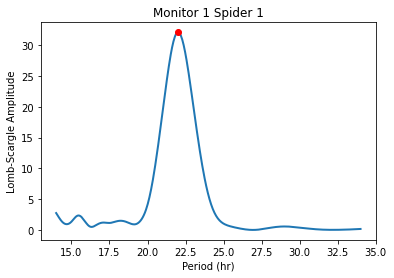

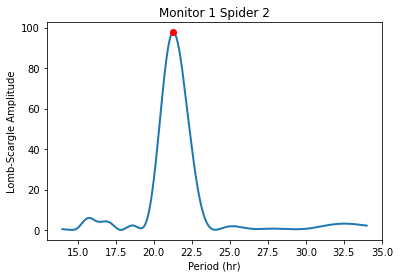

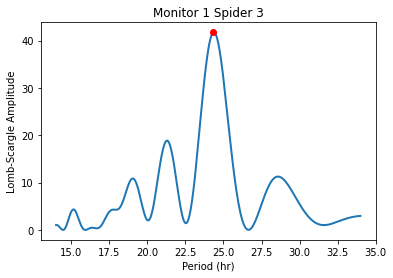

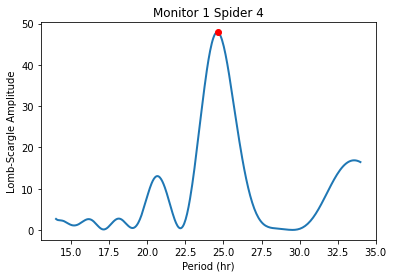

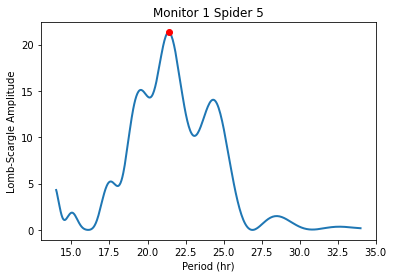

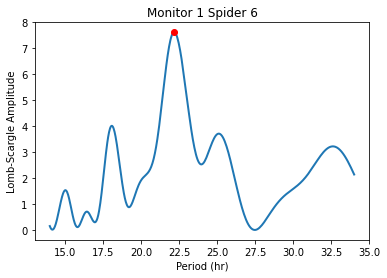

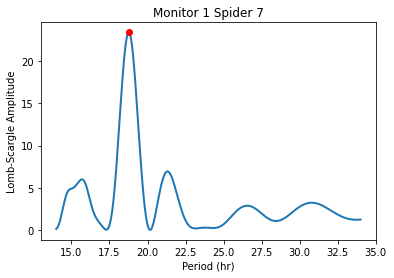

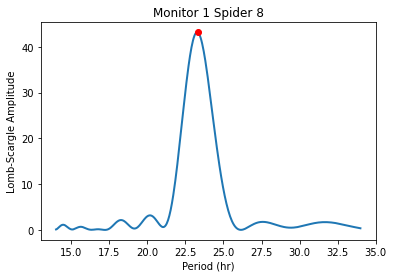

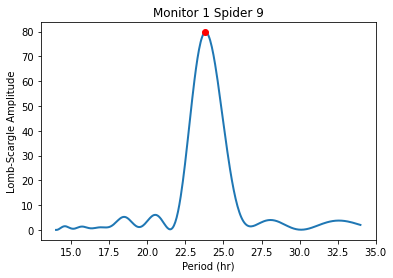

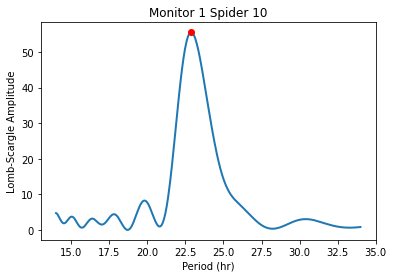

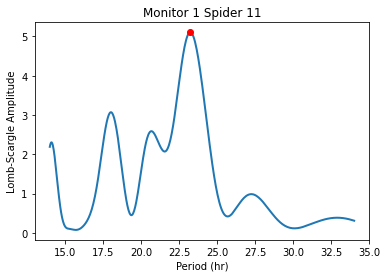

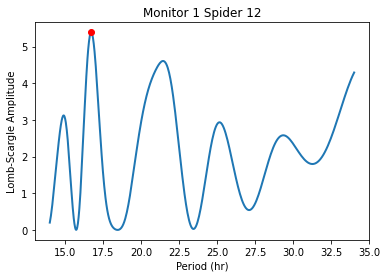

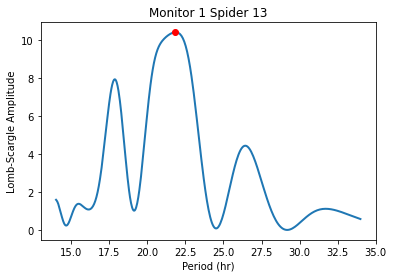

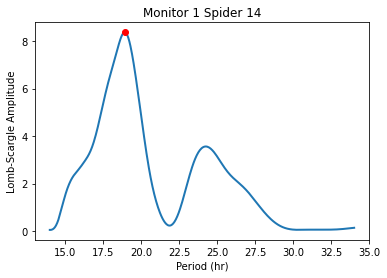

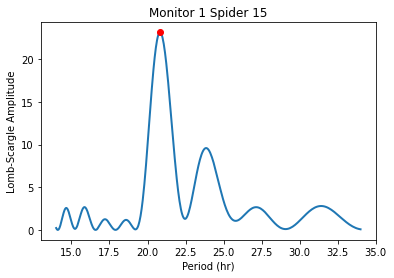

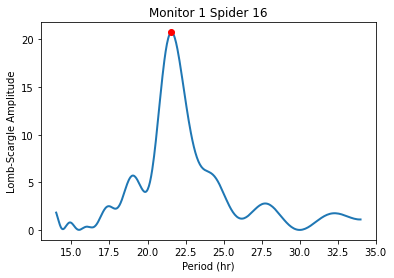

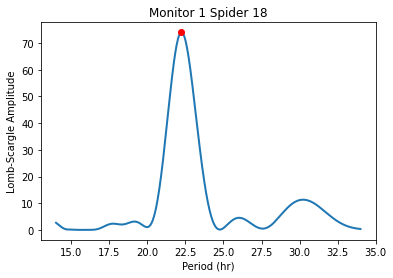

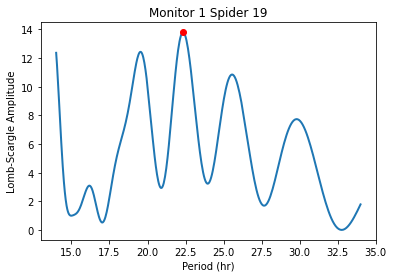

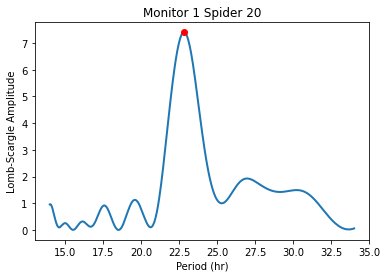

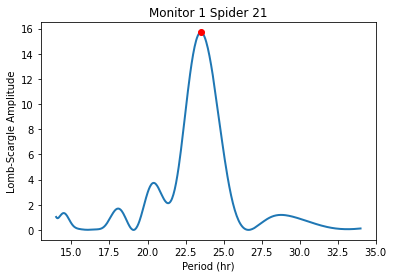

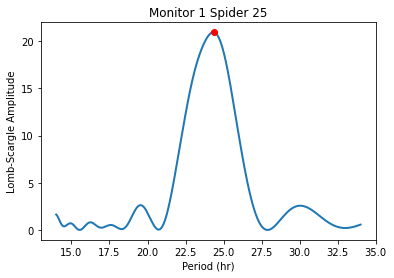

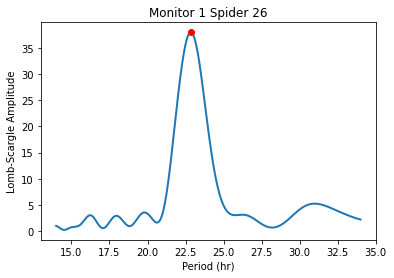

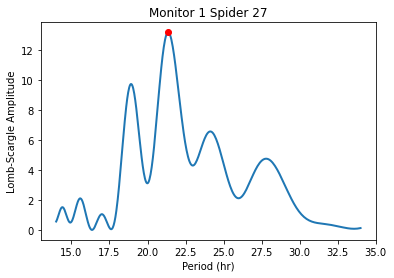

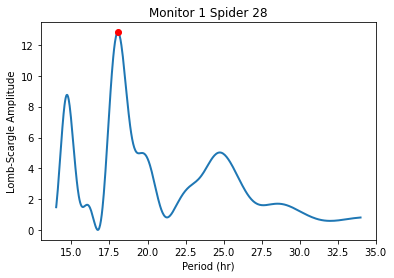

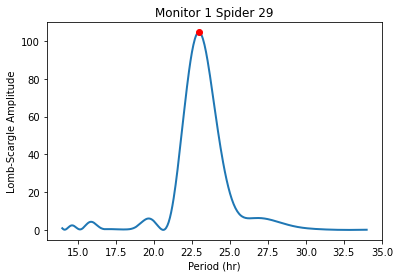

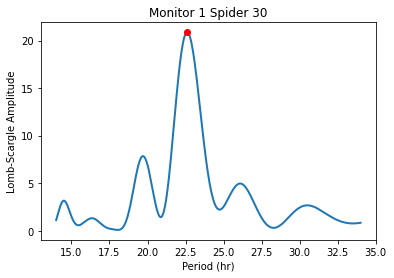

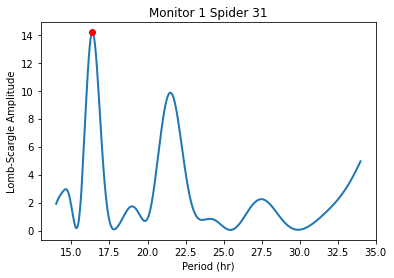

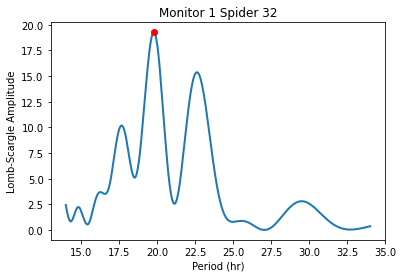

Period  Amplitude       p value
Spider                                                
Monitor 1 Spider 1  22.011150  32.097696  2.157651e-09
Monitor 1 Spider 2  21.274009  97.699565  1.216633e-37
Monitor 1 Spider 3  24.343142  41.760018  1.566141e-13
Monitor 1 Spider 4  24.620637  47.907393  3.588234e-16
Monitor 1 Spider 5  21.400484  21.322867  8.406165e-05

In [101]:
spider_datafile_base = "Binary DF_DD"                    
df_outbinary = LS_Period_Amplitude_FalseAlarm_Pgram(spider_datafile_base)
df_outbinary = df_outbinary.set_index('Spider')   
#outfile = spider_datafile_base + '_Stats.csv'  
#df_out.to_csv(outfile)              
display(df_outbinary.head())                     

In [103]:
period=pd.read_csv('Metazygia Period Data.csv', index_col=0)
period['Binary Period']=df_outbinary['Period']
display(period)
#period.to_csv('Metazygia Period Data.csv')

All Days  Minus Day 1  Minus Day 1 and 2  Binary Period  \
Monitor 1 Spider 1   22.011150    22.101170          22.101074      22.011150   
Monitor 1 Spider 2   21.316001    21.411015          21.315825      21.274009   
Monitor 1 Spider 3   24.453386    24.159275          23.072459      24.343142   
Monitor 1 Spider 4   24.676897    24.592538          25.144622      24.620637   
Monitor 1 Spider 5   21.316001    21.949560          22.637170      21.400484   
Monitor 1 Spider 6   22.283665    22.101170          22.336171      22.146569   
Monitor 1 Spider 7   18.760847    18.846713          18.580817      18.760847   
Monitor 1 Spider 8   23.242881    23.280390          23.393771      23.293014   
Monitor 1 Spider 9   23.806503    23.799876          23.657338      23.806503   
Monitor 1 Spider 10  22.897901    23.393862          23.393771      22.897901   
Monitor 1 Spider 11  23.546960    23.978229          17.907361      23.242881   
Monitor 1 Spider 12  16.726750    14.692712          32.804848      16.726750   
Monitor 1 Spider 13  21.921787    21.315924          21.424570      21.833147   
Monitor 1 Spider 14  18.925236    18.519468          18.297470      18.925236   
Monitor 1 Spider 15  20.822787    20.762657          20.891666      20.822787   
Monitor 1 Spider 16  21.571475    21.949560          21.927975      21.571475   
Monitor 1 Spider 18  22.237778    22.152174          22.101074      22.237778   
Monitor 1 Spider 19  22.329742    14.006666          13.997811      22.329742   
Monitor 1 Spider 20  22.705329    22.410762          21.927975      22.801209   
Monitor 1 Spider 21  23.495729    23.508445          23.590891      23.495729   
Monitor 1 Spider 25  24.508883    24.655704          25.220124      24.343142   
Monitor 1 Spider 26  22.801209    22.622021          22.759853      22.849453   
Monitor 1 Spider 27  21.400484    21.800016          22.515802      21.358159   
Monitor 1 Spider 28  18.009941    18.809782          18.746704      18.040027   
Monitor 1 Spider 29  22.995418    22.837300          22.759853      22.995418   
Monitor 1 Spider 30  22.610253    22.891762          23.590891      22.610253   
Monitor 1 Spider 31  16.421527    16.540921          16.435622      16.371737   
Monitor 1 Spider 32  19.792376    20.584562          20.839830      19.792376   

                     Diff Binary - All Days  Optimal Period  \
Monitor 1 Spider 1                 0.000000       22.011150   
Monitor 1 Spider 2                -0.041992       21.316001   
Monitor 1 Spider 3                -0.110244       23.072459   
Monitor 1 Spider 4                -0.056260       24.676897   
Monitor 1 Spider 5                 0.084483       22.946268   
Monitor 1 Spider 6                -0.137096       22.516833   
Monitor 1 Spider 7                 0.000000       18.580817   
Monitor 1 Spider 8                 0.050133       23.242881   
Monitor 1 Spider 9                 0.000000       23.806503   
Monitor 1 Spider 10                0.000000       23.393862   
Monitor 1 Spider 11               -0.304079       21.283306   
Monitor 1 Spider 12                0.000000        0.000000   
Monitor 1 Spider 13               -0.088640       22.100767   
Monitor 1 Spider 14                0.000000        0.000000   
Monitor 1 Spider 15                0.000000       21.322787   
Monitor 1 Spider 16                0.000000       22.571475   
Monitor 1 Spider 18                0.000000       22.237778   
Monitor 1 Spider 19                0.000000       19.506371   
Monitor 1 Spider 20                0.095879       22.705329   
Monitor 1 Spider 21                0.000000       23.495729   
Monitor 1 Spider 25               -0.165741       23.838883   
Monitor 1 Spider 26                0.048244       22.801209   
Monitor 1 Spider 27               -0.042325       22.515676   
Monitor 1 Spider 28                0.030086       18.009941   
Monitor 1 Spider 29                0.000000       22.995418   
Monitor 1 Spider 30               

In [104]:
perbinary=period.loc[:,['Binary Period']]
display(perbinary)

Binary Period
Monitor 1 Spider 1       22.011150
Monitor 1 Spider 2       21.274009
Monitor 1 Spider 3       24.343142
Monitor 1 Spider 4       24.620637
Monitor 1 Spider 5       21.400484
Monitor 1 Spider 6       22.146569
Monitor 1 Spider 7       18.760847
Monitor 1 Spider 8       23.293014
Monitor 1 Spider 9       23.806503
Monitor 1 Spider 10      22.897901
Monitor 1 Spider 11      23.242881
Monitor 1 Spider 12      16.726750
Monitor 1 Spider 13      21.833147
Monitor 1 Spider 14      18.925236
Monitor 1 Spider 15      20.822787
Monitor 1 Spider 16      21.571475
Monitor 1 Spider 18      22.237778
Monitor 1 Spider 19      22.329742
Monitor 1 Spider 20      22.801209
Monitor 1 Spider 21      23.495729
Monitor 1 Spider 25      24.343142
Monitor 1 Spider 26      22.849453
Monitor 1 Spider 27      21.358159
Monitor 1 Spider 28      18.040027
Monitor 1 Spider 29      22.995418
Monitor 1 Spider 30      22.610253
Monitor 1 Spider 31      16.371737
Monitor 1 Spider 32      19.792376

In [ ]:
#spider_raster(df,perbinary)

In [69]:
minusthree=df.iloc[4*day:]
minusthree.to_csv('Metazygia monitor 1_DD-MINUS DAY 1, 2, AND 3.csv') 

testminusthree=minusthree.loc[:,['lights','Monitor 1 Spider 5','Monitor 1 Spider 19','Monitor 1 Spider 32']]
#testminusthree.to_csv('TEST DELETE 4.csv')


72.47730389823144


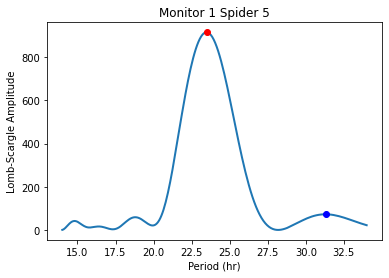

269.87682834617044


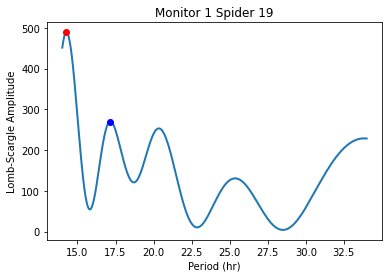

80.41785948830237


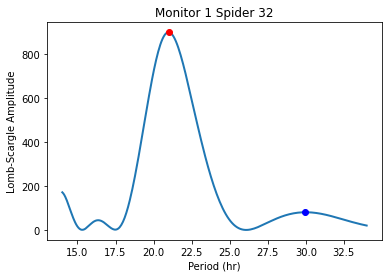

Period   Amplitude        p value
Spider                                                   
Monitor 1 Spider 5   23.485061  915.064259   0.000000e+00
Monitor 1 Spider 19  14.268576  489.183470  1.446771e-207
Monitor 1 Spider 32  21.016812  898.559224   0.000000e+00

In [70]:
'''''spider_datafile_base = "TEST DELETE 4"                    
df_outthree = LS_Period_Amplitude_FalseAlarm_Pgram(spider_datafile_base)
df_outthree = df_outthree.set_index('Spider')   
#outfile = spider_datafile_base + '_Stats.csv'  
#df_out.to_csv(outfile)              
display(df_outthree.head())'''''

Period
Spider                        
Monitor 1 Spider 5   23.485061
Monitor 1 Spider 19  14.268576
Monitor 1 Spider 32  21.016812

Monitor 1 Spider 32
Next spider


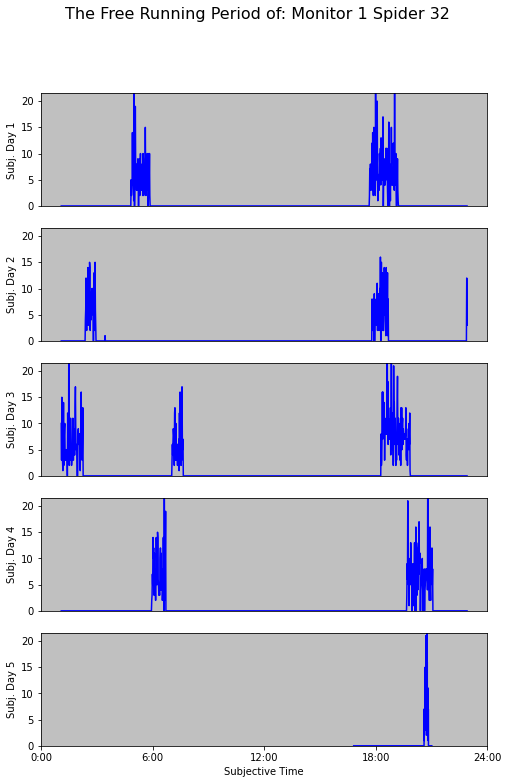

In [71]:
'''''perthree=df_outthree.loc[:,['Period']]
#display(perthree)
testingminusthree=minusthree.loc[:,['lights','Monitor 1 Spider 32']]
#per=pd.read_csv('Metazygia Period Data.csv', index_col=0)
perall=df_outthree.loc[:,['Period']]
perthree['Period']=perthree['Period'] #Add 15 min
display(perthree)
#spider_raster(manual, perall)
spider_raster(testingminusthree,perthree)'''''

In [ ]:
fourdays=df.iloc[-(4*day):]
fourdays.to_csv('Metazygia monitor 1_DD-LAST 4 DAYS.csv') 

spider_datafile_base = "Metazygia monitor 1_DD-LAST 4 DAYS"                    
df_outfour = LS_Period_Amplitude_FalseAlarm_Pgram(spider_datafile_base)
df_outfour = df_outfour.set_index('Spider')   
outfile = spider_datafile_base + '_Stats.csv'  
df_out.to_csv(outfile)              
display(df_outfour.head()) 
#display(fourdays)
